In [1]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
# Paths to the dataset
base_dir = 'data\Data_png'

# Paths for each class
MR_dir = os.path.join(base_dir, 'MR_MFCC')
MS_dir = os.path.join(base_dir, 'MS_MFCC')
Normal_dir = os.path.join(base_dir, 'Normal_MFCC')

# Gather all image paths for each class
MR_images = [os.path.join(MR_dir, fname) for fname in os.listdir(MR_dir)]
MS_images = [os.path.join(MS_dir, fname) for fname in os.listdir(MS_dir)]
Normal_images = [os.path.join(Normal_dir, fname) for fname in os.listdir(Normal_dir)]

# Split the data into training and validation for each class
train_MR, val_MR = train_test_split(MR_images, test_size=0.2, random_state=42)
train_MS, val_MS = train_test_split(MS_images, test_size=0.2, random_state=42)
train_Normal, val_Normal = train_test_split(Normal_images, test_size=0.2, random_state=42)

# Combine the data from different classes
train_data = train_MR + train_MS + train_Normal
val_data = val_MR + val_MS + val_Normal

# Labels for the data
train_labels = ['MR_MFCC'] * len(train_MR) + ['MS_MFCC'] * len(train_MS) + ['Normal_MFCC'] * len(train_Normal)
val_labels = ['MR_MFCC'] * len(val_MR) + ['MS_MFCC'] * len(val_MS) + ['Normal_MFCC'] * len(val_Normal)

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Just normalization for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_dataframe to generate batches
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_data, 'class': val_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 381 validated image filenames belonging to 3 classes.
Found 99 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import  tensorflow as tf
model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 4
model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 5
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the model
model.add(Flatten())

# Layer 6
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 8
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

# Layer 9
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

# Layer 10 (Output Layer)
model.add(Dense(3, activation='softmax'))  # 3 classes: MR, MS, and Normal

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to check the architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 384)         885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 6, 6, 384)        

In [4]:
# Assuming the model has been defined as shown in the previous sections...

# Training the model using the train_generator and val_generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)


Epoch 1/20
11/11 [==============================] - 33s 1s/step - loss: 1.1323 - accuracy: 0.3381 - val_loss: 1.1066 - val_accuracy: 0.3229
Epoch 2/20
11/11 [==============================] - 13s 1s/step - loss: 1.1079 - accuracy: 0.3352 - val_loss: 1.1006 - val_accuracy: 0.3125
Epoch 3/20
11/11 [==============================] - 12s 1s/step - loss: 1.1032 - accuracy: 0.2926 - val_loss: 1.0999 - val_accuracy: 0.3229
Epoch 4/20
11/11 [==============================] - 11s 904ms/step - loss: 1.1021 - accuracy: 0.3009 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 5/20
11/11 [==============================] - 13s 1s/step - loss: 1.0991 - accuracy: 0.3496 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/20
11/11 [==============================] - 12s 1s/step - loss: 1.0986 - accuracy: 0.3295 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 7/20
11/11 [==============================] - 11s 907ms/step - loss: 1.1020 - accuracy: 0.3324 - val_loss: 1.0991 - val_accuracy: 0.3229
Epoch 8/20
11/

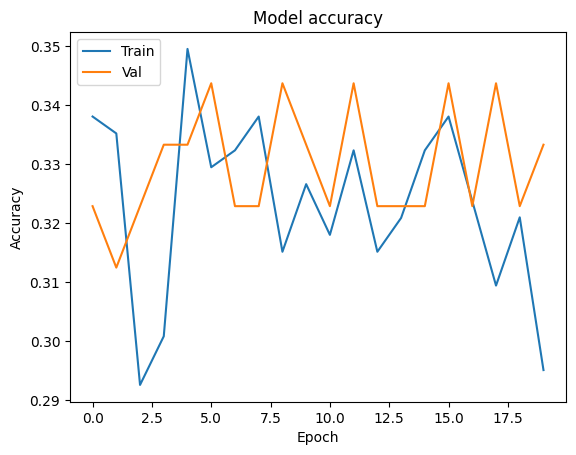

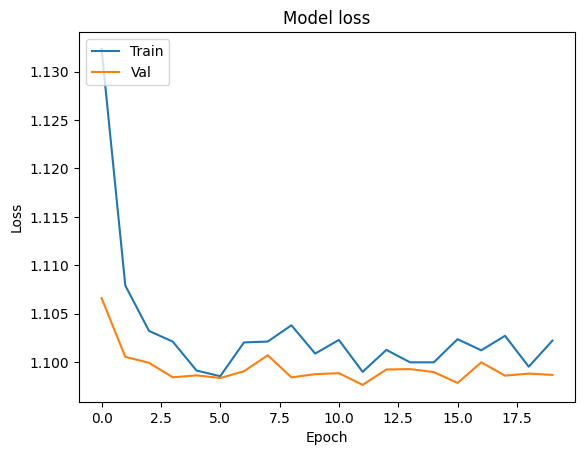

In [5]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [6]:
# Assuming the model has been defined as shown in the previous sections...

# Training the model using the train_generator and val_generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)


Epoch 1/30
11/11 [==============================] - 14s 1s/step - loss: 1.1009 - accuracy: 0.2808 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 2/30
11/11 [==============================] - 13s 1s/step - loss: 1.0996 - accuracy: 0.3524 - val_loss: 1.0995 - val_accuracy: 0.3229
Epoch 3/30
11/11 [==============================] - 14s 1s/step - loss: 1.1004 - accuracy: 0.3295 - val_loss: 1.0994 - val_accuracy: 0.3229
Epoch 4/30
11/11 [==============================] - 13s 1s/step - loss: 1.0987 - accuracy: 0.3352 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 5/30
11/11 [==============================] - 13s 1s/step - loss: 1.1001 - accuracy: 0.3266 - val_loss: 1.0997 - val_accuracy: 0.3333
Epoch 6/30
11/11 [==============================] - 12s 1s/step - loss: 1.1004 - accuracy: 0.3123 - val_loss: 1.1004 - val_accuracy: 0.3125
Epoch 7/30
11/11 [==============================] - 11s 900ms/step - loss: 1.1014 - accuracy: 0.2980 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 8/30
11/11 

Found 381 validated image filenames belonging to 3 classes.
Found 99 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 384)         885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 6, 6, 384)        

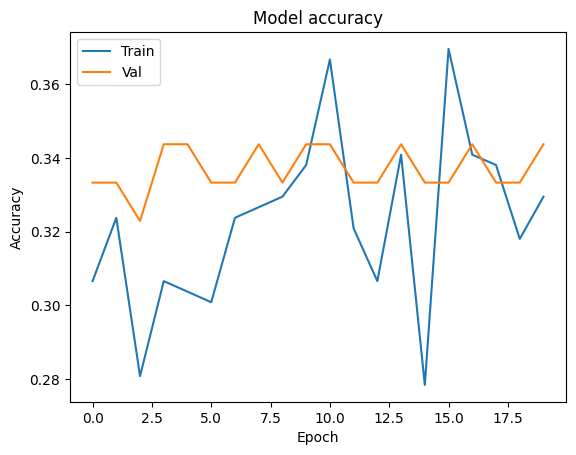

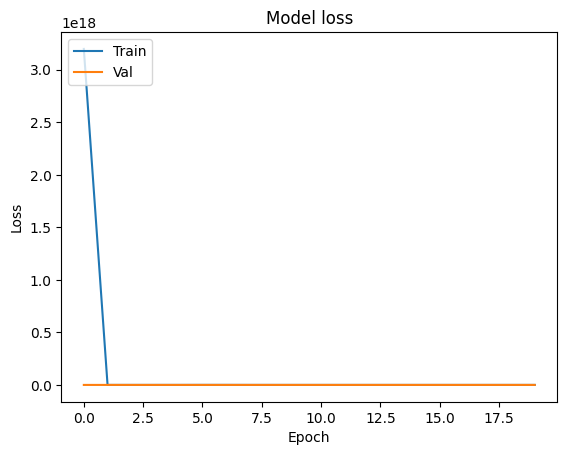

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow import keras

# ===================== Data Loading and Preprocessing =====================

# Paths to the dataset
base_dir = 'data\Data_png'

# Paths for each class
MR_dir = os.path.join(base_dir, 'MR_MFCC')
MS_dir = os.path.join(base_dir, 'MS_MFCC')
Normal_dir = os.path.join(base_dir, 'Normal_MFCC')

# Gather all image paths for each class
MR_images = [os.path.join(MR_dir, fname) for fname in os.listdir(MR_dir)]
MS_images = [os.path.join(MS_dir, fname) for fname in os.listdir(MS_dir)]
Normal_images = [os.path.join(Normal_dir, fname) for fname in os.listdir(Normal_dir)]

# Split the data into training and validation for each class
train_MR, val_MR = train_test_split(MR_images, test_size=0.2, random_state=42)
train_MS, val_MS = train_test_split(MS_images, test_size=0.2, random_state=42)
train_Normal, val_Normal = train_test_split(Normal_images, test_size=0.2, random_state=42)

# Combine the data from different classes
train_data = train_MR + train_MS + train_Normal
val_data = val_MR + val_MS + val_Normal

# Labels for the data
train_labels = ['MR_MFCC'] * len(train_MR) + ['MS_MFCC'] * len(train_MS) + ['Normal_MFCC'] * len(train_Normal)
val_labels = ['MR_MFCC'] * len(val_MR) + ['MS_MFCC'] * len(val_MS) + ['Normal_MFCC'] * len(val_Normal)

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Just normalization for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_dataframe to generate batches
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_data, 'class': val_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# ===================== Model Definition =====================

model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 4
model.add(Conv2D(384, (3, 3), activation='relu'))

# Layer 5
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the model
model.add(Flatten())

# Layer 6
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 8
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

# Layer 9
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

# Layer 10 (Output Layer)
model.add(Dense(3, activation='softmax'))  # 3 classes: MR, MS, and Normal

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to check the architecture
model.summary()


optimizer = keras.optimizers.Adam(learning_rate=0.3)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ===================== Model Training =====================

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)

# ===================== Plotting Results =====================

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [5]:
import tensorflow as tf
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the dataset
base_dir = 'data/Data_png'  # Replace with your actual path

# ... [rest of data preprocessing code remains unchanged]


In [6]:
# Paths for each class
MR_dir = os.path.join(base_dir, 'MR_MFCC')
MS_dir = os.path.join(base_dir, 'MS_MFCC')
Normal_dir = os.path.join(base_dir, 'Normal_MFCC')

# Gather all image paths for each class
MR_images = [os.path.join(MR_dir, fname) for fname in os.listdir(MR_dir)]
MS_images = [os.path.join(MS_dir, fname) for fname in os.listdir(MS_dir)]
Normal_images = [os.path.join(Normal_dir, fname) for fname in os.listdir(Normal_dir)]

# Split the data into training and validation for each class
train_MR, val_MR = train_test_split(MR_images, test_size=0.2, random_state=42)
train_MS, val_MS = train_test_split(MS_images, test_size=0.2, random_state=42)
train_Normal, val_Normal = train_test_split(Normal_images, test_size=0.2, random_state=42)

# Combine the data from different classes
train_data = train_MR + train_MS + train_Normal
val_data = val_MR + val_MS + val_Normal

# Labels for the data
train_labels = ['MR_MFCC'] * len(train_MR) + ['MS_MFCC'] * len(train_MS) + ['Normal_MFCC'] * len(train_Normal)
val_labels = ['MR_MFCC'] * len(val_MR) + ['MS_MFCC'] * len(val_MS) + ['Normal_MFCC'] * len(val_Normal)

# Just normalization for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Validation data generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_data, 'class': val_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
print(len(train_labels),len(val_labels))

Found 99 validated image filenames belonging to 3 classes.
384 99


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(dropout_rate=0.5):
    model = Sequential()
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(256, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(384, (3, 3), activation='relu'))
    model.add(Conv2D(384, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # 3 classes: MR, MS, and Normal
    return model


In [24]:
LEARNING_RATES = [0.001, 0.01, 0.1]
DROPOUT_RATES = [0.2, 0.3, 0.4, 0.5]
ROTATION_RANGES = [10, 20, 30]
BATCH_SIZES = [16, 32, 64]

results = []

for lr in LEARNING_RATES:
    for batch_size in BATCH_SIZES:
        for dropout_rate in DROPOUT_RATES:
            for rotation_range in ROTATION_RANGES:

                # ... [Data augmentation code remains unchanged]

                model = build_model(dropout_rate=dropout_rate)
                optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
                
                history = model.fit(
                    train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,  # Adjust based on needs
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size,
                    verbose=0)
                
                best_val_accuracy = max(history.history['val_accuracy'])
                results.append((lr, batch_size, dropout_rate, rotation_range, best_val_accuracy))
                
                # Print results for the current set of hyperparameters
                print(f"LR={lr}, Batch Size={batch_size}, Dropout={dropout_rate}, Rotation={rotation_range}. Val Acc: {best_val_accuracy:.4f}")

results.sort(key=lambda x: x[4], reverse=True)
best_parameters = results[0]
print("\n")
print(f"Best hyperparameters: LR={best_parameters[0]}, Batch Size={best_parameters[1]}, Dropout={best_parameters[2]}, Rotation={best_parameters[3]}. Best Val Acc: {best_parameters[4]:.4f}")



KeyboardInterrupt



In [26]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 27s 1s/step - loss: 1.1579 - accuracy: 0.3342 - val_loss: 1.0996 - val_accuracy: 0.3333
Epoch 2/10
23/23 [==============================] - 19s 828ms/step - loss: 1.1005 - accuracy: 0.2932
Epoch 3/10
23/23 [==============================] - 18s 822ms/step - loss: 1.1002 - accuracy: 0.3370
Epoch 4/10
23/23 [==============================] - 19s 831ms/step - loss: 1.0996 - accuracy: 0.3041
Epoch 5/10
23/23 [==============================] - 18s 680ms/step - loss: 1.0993 - accuracy: 0.3342
Epoch 6/10
23/23 [==============================] - 18s 677ms/step - loss: 1.0992 - accuracy: 0.3205
Epoch 7/10
23/23 [==============================] - 18s 679ms/step - loss: 1.0989 - accuracy: 0.3041
Epoch 8/10
23/23 [==============================] - 18s 667ms/step - loss: 1.0990 - accuracy: 0.3342
Epoch 9/10
23/23 [==============================] - 18s 675ms/step - loss: 1.0988 - accuracy: 0.3425
Epoch 10/10
23/23 [==============================] -

In [27]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 27s 1s/step - loss: 1.1197 - accuracy: 0.2986 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 2/20
23/23 [==============================] - 18s 810ms/step - loss: 1.1001 - accuracy: 0.3151
Epoch 3/20
23/23 [==============================] - 18s 811ms/step - loss: 1.1015 - accuracy: 0.3096
Epoch 4/20
23/23 [==============================] - 19s 849ms/step - loss: 1.0990 - accuracy: 0.3152
Epoch 5/20
23/23 [==============================] - 19s 839ms/step - loss: 1.0995 - accuracy: 0.3452
Epoch 6/20
23/23 [==============================] - 19s 833ms/step - loss: 1.0990 - accuracy: 0.3123
Epoch 7/20
23/23 [==============================] - 19s 851ms/step - loss: 1.0990 - accuracy: 0.3068
Epoch 8/20
23/23 [==============================] - 15s 689ms/step - loss: 1.0990 - accuracy: 0.2877
Epoch 9/20
23/23 [==============================] - 18s 680ms/step - loss: 1.0988 - accuracy: 0.3151
Epoch 10/20
23/23 [==============================] -

In [28]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=30,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/30
23/23 [==============================] - 24s 891ms/step - loss: 1.1600 - accuracy: 0.3342 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 2/30
23/23 [==============================] - 18s 666ms/step - loss: 1.1032 - accuracy: 0.3370
Epoch 3/30
23/23 [==============================] - 22s 853ms/step - loss: 1.0992 - accuracy: 0.3425
Epoch 4/30
23/23 [==============================] - 18s 822ms/step - loss: 1.0994 - accuracy: 0.3425
Epoch 5/30
23/23 [==============================] - 18s 809ms/step - loss: 1.0988 - accuracy: 0.3342
Epoch 6/30
23/23 [==============================] - 18s 808ms/step - loss: 1.0989 - accuracy: 0.3342
Epoch 7/30
23/23 [==============================] - 19s 687ms/step - loss: 1.0989 - accuracy: 0.3425
Epoch 8/30
23/23 [==============================] - 18s 821ms/step - loss: 1.0994 - accuracy: 0.2932
Epoch 9/30
23/23 [==============================] - 18s 827ms/step - loss: 1.0992 - accuracy: 0.2959
Epoch 10/30
23/23 [==============================

In [29]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=40,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/40
23/23 [==============================] - 26s 1s/step - loss: 1.2780 - accuracy: 0.3123 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/40
23/23 [==============================] - 18s 806ms/step - loss: 1.1011 - accuracy: 0.2712
Epoch 3/40
23/23 [==============================] - 18s 806ms/step - loss: 1.0996 - accuracy: 0.3125
Epoch 4/40
23/23 [==============================] - 18s 805ms/step - loss: 1.0997 - accuracy: 0.3205
Epoch 5/40
23/23 [==============================] - 18s 817ms/step - loss: 1.0991 - accuracy: 0.3205
Epoch 6/40
23/23 [==============================] - 18s 808ms/step - loss: 1.0993 - accuracy: 0.3315
Epoch 7/40
23/23 [==============================] - 18s 812ms/step - loss: 1.0989 - accuracy: 0.3342
Epoch 8/40
23/23 [==============================] - 18s 812ms/step - loss: 1.0990 - accuracy: 0.3288
Epoch 9/40
23/23 [==============================] - 18s 787ms/step - loss: 1.0987 - accuracy: 0.3425
Epoch 10/40
23/23 [==============================] -

In [30]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/50
23/23 [==============================] - 23s 1s/step - loss: 1.3807 - accuracy: 0.3096 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 2/50
23/23 [==============================] - 18s 814ms/step - loss: 1.1012 - accuracy: 0.3233
Epoch 3/50
23/23 [==============================] - 18s 790ms/step - loss: 1.0989 - accuracy: 0.3041
Epoch 4/50
23/23 [==============================] - 18s 800ms/step - loss: 1.1003 - accuracy: 0.3151
Epoch 5/50
23/23 [==============================] - 18s 807ms/step - loss: 1.0994 - accuracy: 0.3370
Epoch 6/50
23/23 [==============================] - 18s 806ms/step - loss: 1.0986 - accuracy: 0.3233
Epoch 7/50
23/23 [==============================] - 18s 805ms/step - loss: 1.0990 - accuracy: 0.3260
Epoch 8/50
23/23 [==============================] - 18s 804ms/step - loss: 1.0988 - accuracy: 0.3233
Epoch 9/50
23/23 [==============================] - 18s 808ms/step - loss: 1.0990 - accuracy: 0.3370
Epoch 10/50
23/23 [==============================] -

In [31]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/100
23/23 [==============================] - 23s 1s/step - loss: 1.1462 - accuracy: 0.3014 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 2/100
23/23 [==============================] - 18s 812ms/step - loss: 1.1001 - accuracy: 0.2986
Epoch 3/100
23/23 [==============================] - 18s 816ms/step - loss: 1.1006 - accuracy: 0.3178
Epoch 4/100
23/23 [==============================] - 23s 1s/step - loss: 1.0995 - accuracy: 0.3096
Epoch 5/100
23/23 [==============================] - 18s 791ms/step - loss: 1.0992 - accuracy: 0.3342
Epoch 6/100
23/23 [==============================] - 18s 806ms/step - loss: 1.0989 - accuracy: 0.3233
Epoch 7/100
23/23 [==============================] - 18s 812ms/step - loss: 1.0995 - accuracy: 0.3452
Epoch 8/100
23/23 [==============================] - 18s 810ms/step - loss: 1.0994 - accuracy: 0.3014
Epoch 9/100
23/23 [==============================] - 22s 997ms/step - loss: 1.0989 - accuracy: 0.2932
Epoch 10/100
23/23 [==========================

In [32]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=150,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/150
23/23 [==============================] - 23s 880ms/step - loss: 1.2886 - accuracy: 0.2795 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 2/150
23/23 [==============================] - 22s 843ms/step - loss: 1.1015 - accuracy: 0.3123
Epoch 3/150
23/23 [==============================] - 18s 825ms/step - loss: 1.0996 - accuracy: 0.3123
Epoch 4/150
23/23 [==============================] - 19s 705ms/step - loss: 1.1001 - accuracy: 0.2630
Epoch 5/150
23/23 [==============================] - 23s 877ms/step - loss: 1.0994 - accuracy: 0.2986
Epoch 6/150
23/23 [==============================] - 18s 807ms/step - loss: 1.0991 - accuracy: 0.3315
Epoch 7/150
23/23 [==============================] - 19s 838ms/step - loss: 1.0990 - accuracy: 0.3288
Epoch 8/150
23/23 [==============================] - 19s 854ms/step - loss: 1.0989 - accuracy: 0.3096
Epoch 9/150
23/23 [==============================] - 18s 811ms/step - loss: 1.0988 - accuracy: 0.3260
Epoch 10/150
23/23 [====================

In [33]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=200,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\CNN_GPU\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/200
23/23 [==============================] - 24s 895ms/step - loss: 1.4947 - accuracy: 0.3068 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/200
23/23 [==============================] - 18s 823ms/step - loss: 1.0996 - accuracy: 0.3425
Epoch 3/200
23/23 [==============================] - 18s 820ms/step - loss: 1.0990 - accuracy: 0.3397
Epoch 4/200
23/23 [==============================] - 18s 817ms/step - loss: 1.0994 - accuracy: 0.3151
Epoch 5/200
23/23 [==============================] - 18s 814ms/step - loss: 1.0988 - accuracy: 0.3151
Epoch 6/200
23/23 [==============================] - 19s 830ms/step - loss: 1.0989 - accuracy: 0.3425
Epoch 7/200
23/23 [==============================] - 18s 810ms/step - loss: 1.0986 - accuracy: 0.3014
Epoch 8/200
23/23 [==============================] - 18s 801ms/step - loss: 1.0989 - accuracy: 0.3233
Epoch 9/200
23/23 [==============================] - 18s 654ms/step - loss: 1.0992 - accuracy: 0.3151
Epoch 10/200
23/23 [====================

23/23 [==============================] - 16s 690ms/step - loss: 1.0988 - accuracy: 0.3370
Epoch 156/200
23/23 [==============================] - 19s 864ms/step - loss: 1.0987 - accuracy: 0.3315
Epoch 157/200
23/23 [==============================] - 19s 848ms/step - loss: 1.0987 - accuracy: 0.3342
Epoch 158/200
23/23 [==============================] - 19s 845ms/step - loss: 1.0987 - accuracy: 0.3014
Epoch 159/200
23/23 [==============================] - 19s 843ms/step - loss: 1.0987 - accuracy: 0.3151
Epoch 160/200
23/23 [==============================] - 16s 691ms/step - loss: 1.0987 - accuracy: 0.3041
Epoch 161/200
23/23 [==============================] - 18s 674ms/step - loss: 1.0987 - accuracy: 0.3342
Epoch 162/200
23/23 [==============================] - 19s 851ms/step - loss: 1.0988 - accuracy: 0.3041
Epoch 163/200
23/23 [==============================] - 19s 851ms/step - loss: 1.0987 - accuracy: 0.2959
Epoch 164/200
23/23 [==============================] - 19s 826ms/step - loss: 

In [8]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=250,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/250
23/23 [==============================] - 10s 225ms/step - loss: 1.2595 - accuracy: 0.3452 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 2/250
23/23 [==============================] - 3s 118ms/step - loss: 1.1010 - accuracy: 0.3068
Epoch 3/250
23/23 [==============================] - 3s 119ms/step - loss: 1.0999 - accuracy: 0.3260
Epoch 4/250
23/23 [==============================] - 3s 117ms/step - loss: 1.1005 - accuracy: 0.3260
Epoch 5/250
23/23 [==============================] - 3s 121ms/step - loss: 1.0989 - accuracy: 0.3096
Epoch 6/250
23/23 [==============================] - 3s 117ms/step - loss: 1.0992 - accuracy: 0.2795
Epoch 7/250
23/23 [==============================] - 3s 120ms/step - loss: 1.0990 - accuracy: 0.3342
Epoch 8/250
23/23 [==============================] - 3s 118ms/step - loss: 1.0988 - accuracy: 0.3096
Epoch 9/250
23/23 [==============================] - 3s 120ms/step - loss: 1.0990 - accuracy: 0.3260
Epoch 10/250
23/23 [============================

23/23 [==============================] - 3s 119ms/step - loss: 1.0988 - accuracy: 0.3151
Epoch 157/250
23/23 [==============================] - 3s 118ms/step - loss: 1.0987 - accuracy: 0.2959
Epoch 158/250
23/23 [==============================] - 3s 118ms/step - loss: 1.0986 - accuracy: 0.3151
Epoch 159/250
23/23 [==============================] - 3s 120ms/step - loss: 1.0987 - accuracy: 0.3096
Epoch 160/250
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - accuracy: 0.3068
Epoch 161/250
23/23 [==============================] - 3s 119ms/step - loss: 1.0987 - accuracy: 0.3370
Epoch 162/250
23/23 [==============================] - 3s 119ms/step - loss: 1.0988 - accuracy: 0.3041
Epoch 163/250
23/23 [==============================] - 3s 119ms/step - loss: 1.0987 - accuracy: 0.3041
Epoch 164/250
23/23 [==============================] - 3s 119ms/step - loss: 1.0987 - accuracy: 0.2822
Epoch 165/250
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - a

In [9]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=300,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/300
23/23 [==============================] - 8s 314ms/step - loss: 1.1152 - accuracy: 0.3205 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 2/300
23/23 [==============================] - 6s 256ms/step - loss: 1.1024 - accuracy: 0.3370
Epoch 3/300
23/23 [==============================] - 6s 258ms/step - loss: 1.1004 - accuracy: 0.3315
Epoch 4/300
23/23 [==============================] - 6s 256ms/step - loss: 1.0996 - accuracy: 0.3370
Epoch 5/300
23/23 [==============================] - 6s 259ms/step - loss: 1.0990 - accuracy: 0.3205
Epoch 6/300
23/23 [==============================] - 6s 258ms/step - loss: 1.0995 - accuracy: 0.2986
Epoch 7/300
23/23 [==============================] - 6s 257ms/step - loss: 1.1004 - accuracy: 0.3233
Epoch 8/300
23/23 [==============================] - 6s 262ms/step - loss: 1.0988 - accuracy: 0.3288
Epoch 9/300
23/23 [==============================] - 6s 255ms/step - loss: 1.0995 - accuracy: 0.3041
Epoch 10/300
23/23 [=============================

23/23 [==============================] - 6s 261ms/step - loss: 1.0987 - accuracy: 0.3205
Epoch 157/300
23/23 [==============================] - 6s 258ms/step - loss: 1.0988 - accuracy: 0.3507
Epoch 158/300
23/23 [==============================] - 6s 258ms/step - loss: 1.0987 - accuracy: 0.2932
Epoch 159/300
23/23 [==============================] - 6s 258ms/step - loss: 1.0986 - accuracy: 0.3370
Epoch 160/300
23/23 [==============================] - 6s 260ms/step - loss: 1.0988 - accuracy: 0.3342
Epoch 161/300
23/23 [==============================] - 6s 257ms/step - loss: 1.0987 - accuracy: 0.3342
Epoch 162/300
23/23 [==============================] - 6s 257ms/step - loss: 1.0988 - accuracy: 0.3205
Epoch 163/300
23/23 [==============================] - 6s 259ms/step - loss: 1.0987 - accuracy: 0.3233
Epoch 164/300
23/23 [==============================] - 6s 257ms/step - loss: 1.0987 - accuracy: 0.3123
Epoch 165/300
23/23 [==============================] - 6s 264ms/step - loss: 1.0986 - a

In [8]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 16

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=350,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/350
23/23 [==============================] - 11s 267ms/step - loss: 1.3178 - accuracy: 0.3342 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 2/350
23/23 [==============================] - 3s 126ms/step - loss: 1.0995 - accuracy: 0.3014
Epoch 3/350
23/23 [==============================] - 3s 124ms/step - loss: 1.0997 - accuracy: 0.2932
Epoch 4/350
23/23 [==============================] - 3s 125ms/step - loss: 1.0993 - accuracy: 0.3478
Epoch 5/350
23/23 [==============================] - 3s 121ms/step - loss: 1.0996 - accuracy: 0.3041
Epoch 6/350
23/23 [==============================] - 3s 121ms/step - loss: 1.0993 - accuracy: 0.3123
Epoch 7/350
23/23 [==============================] - 3s 123ms/step - loss: 1.0992 - accuracy: 0.3288
Epoch 8/350
23/23 [==============================] - 3s 122ms/step - loss: 1.0993 - accuracy: 0.2986
Epoch 9/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0992 - accuracy: 0.3123
Epoch 10/350
23/23 [============================

23/23 [==============================] - 3s 120ms/step - loss: 1.0986 - accuracy: 0.3644
Epoch 78/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0989 - accuracy: 0.3233
Epoch 79/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0987 - accuracy: 0.3288
Epoch 80/350
23/23 [==============================] - 3s 121ms/step - loss: 1.0989 - accuracy: 0.3342
Epoch 81/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0986 - accuracy: 0.3425
Epoch 82/350
23/23 [==============================] - 3s 119ms/step - loss: 1.0989 - accuracy: 0.3315
Epoch 83/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - accuracy: 0.3342
Epoch 84/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - accuracy: 0.2877
Epoch 85/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - accuracy: 0.3151
Epoch 86/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0986 - accuracy: 

23/23 [==============================] - 3s 120ms/step - loss: 1.0989 - accuracy: 0.3260
Epoch 157/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - accuracy: 0.3096
Epoch 158/350
23/23 [==============================] - 3s 121ms/step - loss: 1.0989 - accuracy: 0.3098
Epoch 159/350
23/23 [==============================] - 3s 119ms/step - loss: 1.0985 - accuracy: 0.3616
Epoch 160/350
23/23 [==============================] - 3s 119ms/step - loss: 1.0985 - accuracy: 0.3589
Epoch 161/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0990 - accuracy: 0.3260
Epoch 162/350
23/23 [==============================] - 3s 122ms/step - loss: 1.0988 - accuracy: 0.3260
Epoch 163/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - accuracy: 0.2658
Epoch 164/350
23/23 [==============================] - 3s 119ms/step - loss: 1.0989 - accuracy: 0.2795
Epoch 165/350
23/23 [==============================] - 3s 119ms/step - loss: 1.0989 - a

23/23 [==============================] - 3s 121ms/step - loss: 1.0988 - accuracy: 0.3425
Epoch 236/350
23/23 [==============================] - 3s 121ms/step - loss: 1.0986 - accuracy: 0.3534
Epoch 237/350
23/23 [==============================] - 3s 121ms/step - loss: 1.0987 - accuracy: 0.3260
Epoch 238/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - accuracy: 0.3233
Epoch 239/350
23/23 [==============================] - 3s 122ms/step - loss: 1.0988 - accuracy: 0.3233
Epoch 240/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0984 - accuracy: 0.3616
Epoch 241/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0987 - accuracy: 0.3342
Epoch 242/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0987 - accuracy: 0.3288
Epoch 243/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0988 - accuracy: 0.3288
Epoch 244/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0987 - a

23/23 [==============================] - 3s 120ms/step - loss: 1.0989 - accuracy: 0.3178
Epoch 315/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0989 - accuracy: 0.2849
Epoch 316/350
23/23 [==============================] - 3s 119ms/step - loss: 1.0985 - accuracy: 0.3397
Epoch 317/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0989 - accuracy: 0.3151
Epoch 318/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0987 - accuracy: 0.3288
Epoch 319/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0987 - accuracy: 0.3342
Epoch 320/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0986 - accuracy: 0.3068
Epoch 321/350
23/23 [==============================] - 3s 120ms/step - loss: 1.0987 - accuracy: 0.3370
Epoch 322/350
23/23 [==============================] - 3s 121ms/step - loss: 1.0988 - accuracy: 0.3151
Epoch 323/350
23/23 [==============================] - 3s 121ms/step - loss: 1.0987 - a

In [10]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=400,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/400
11/11 [==============================] - 8s 603ms/step - loss: 1.3935 - accuracy: 0.3610 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 2/400
11/11 [==============================] - 7s 596ms/step - loss: 1.1046 - accuracy: 0.3209 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 3/400
11/11 [==============================] - 7s 591ms/step - loss: 1.1005 - accuracy: 0.3381 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 4/400
11/11 [==============================] - 7s 586ms/step - loss: 1.0998 - accuracy: 0.3066 - val_loss: 1.0992 - val_accuracy: 0.3229
Epoch 5/400
11/11 [==============================] - 7s 593ms/step - loss: 1.0993 - accuracy: 0.3381 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 6/400
11/11 [==============================] - 7s 601ms/step - loss: 1.0992 - accuracy: 0.3295 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 7/400
11/11 [==============================] - 7s 620ms/step - loss: 1.0987 - accuracy: 0.3123 - val_loss: 1.0986 - val_accuracy: 0.3333

Epoch 58/400
11/11 [==============================] - 6s 590ms/step - loss: 1.0989 - accuracy: 0.3209 - val_loss: 1.0987 - val_accuracy: 0.3229
Epoch 59/400
11/11 [==============================] - 6s 575ms/step - loss: 1.0985 - accuracy: 0.3352 - val_loss: 1.0987 - val_accuracy: 0.3229
Epoch 60/400
11/11 [==============================] - 6s 584ms/step - loss: 1.0993 - accuracy: 0.2980 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 61/400
11/11 [==============================] - 6s 584ms/step - loss: 1.0989 - accuracy: 0.2865 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 62/400
11/11 [==============================] - 6s 576ms/step - loss: 1.0988 - accuracy: 0.2898 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 63/400
11/11 [==============================] - 6s 576ms/step - loss: 1.0987 - accuracy: 0.3381 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 64/400
11/11 [==============================] - 6s 570ms/step - loss: 1.0986 - accuracy: 0.3209 - val_loss: 1.0987 - val_accuracy:

Epoch 115/400
11/11 [==============================] - 7s 598ms/step - loss: 1.0986 - accuracy: 0.3295 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 116/400
11/11 [==============================] - 7s 603ms/step - loss: 1.0989 - accuracy: 0.3295 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 117/400
11/11 [==============================] - 7s 605ms/step - loss: 1.0986 - accuracy: 0.3238 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 118/400
11/11 [==============================] - 7s 627ms/step - loss: 1.0987 - accuracy: 0.3037 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 119/400
11/11 [==============================] - 7s 630ms/step - loss: 1.0988 - accuracy: 0.3037 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 120/400
11/11 [==============================] - 7s 622ms/step - loss: 1.0985 - accuracy: 0.3754 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 121/400
11/11 [==============================] - 7s 623ms/step - loss: 1.0987 - accuracy: 0.3410 - val_loss: 1.0985 - val_ac

11/11 [==============================] - 6s 583ms/step - loss: 1.0985 - accuracy: 0.3553 - val_loss: 1.0986 - val_accuracy: 0.3229
Epoch 228/400
11/11 [==============================] - 7s 586ms/step - loss: 1.0987 - accuracy: 0.3324 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 229/400
11/11 [==============================] - 6s 584ms/step - loss: 1.0988 - accuracy: 0.3037 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 230/400
11/11 [==============================] - 7s 586ms/step - loss: 1.0988 - accuracy: 0.2951 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 231/400
11/11 [==============================] - 6s 585ms/step - loss: 1.0987 - accuracy: 0.3438 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 232/400
11/11 [==============================] - 7s 586ms/step - loss: 1.0986 - accuracy: 0.3467 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 233/400
11/11 [==============================] - 6s 582ms/step - loss: 1.0987 - accuracy: 0.3381 - val_loss: 1.0986 - val_accuracy: 0.3333

11/11 [==============================] - 7s 615ms/step - loss: 1.0985 - accuracy: 0.3467 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 340/400
11/11 [==============================] - 7s 617ms/step - loss: 1.0988 - accuracy: 0.3037 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 341/400
11/11 [==============================] - 7s 613ms/step - loss: 1.0987 - accuracy: 0.3438 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 342/400
11/11 [==============================] - 7s 610ms/step - loss: 1.0986 - accuracy: 0.3410 - val_loss: 1.0986 - val_accuracy: 0.3229
Epoch 343/400
11/11 [==============================] - 7s 612ms/step - loss: 1.0988 - accuracy: 0.3095 - val_loss: 1.0987 - val_accuracy: 0.3125
Epoch 344/400
11/11 [==============================] - 7s 616ms/step - loss: 1.0986 - accuracy: 0.3267 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 345/400
11/11 [==============================] - 7s 613ms/step - loss: 1.0984 - accuracy: 0.3381 - val_loss: 1.0986 - val_accuracy: 0.3438

In [11]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 64

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=500,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/500
5/5 [==============================] - 20s 3s/step - loss: 1.2114 - accuracy: 0.3375 - val_loss: 1.1350 - val_accuracy: 0.2812
Epoch 2/500
5/5 [==============================] - 6s 1s/step - loss: 1.1050 - accuracy: 0.3000 - val_loss: 1.0998 - val_accuracy: 0.3750
Epoch 3/500
5/5 [==============================] - 6s 1s/step - loss: 1.1007 - accuracy: 0.3060 - val_loss: 1.0986 - val_accuracy: 0.3125
Epoch 4/500
5/5 [==============================] - 6s 1s/step - loss: 1.1012 - accuracy: 0.3500 - val_loss: 1.1016 - val_accuracy: 0.2812
Epoch 5/500
5/5 [==============================] - 6s 1s/step - loss: 1.0996 - accuracy: 0.3281 - val_loss: 1.1006 - val_accuracy: 0.2812
Epoch 6/500
5/5 [==============================] - 6s 1s/step - loss: 1.0986 - accuracy: 0.3281 - val_loss: 1.0995 - val_accuracy: 0.3438
Epoch 7/500
5/5 [==============================] - 6s 1s/step - loss: 1.1000 - accuracy: 0.3123 - val_loss: 1.0989 - val_accuracy: 0.3125
Epoch 8/500
5/5 [================

Epoch 60/500
5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.2839 - val_loss: 1.0986 - val_accuracy: 0.2500
Epoch 61/500
5/5 [==============================] - 6s 1s/step - loss: 1.0984 - accuracy: 0.3502 - val_loss: 1.0986 - val_accuracy: 0.4062
Epoch 62/500
5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.3063 - val_loss: 1.1000 - val_accuracy: 0.2812
Epoch 63/500
5/5 [==============================] - 6s 1s/step - loss: 1.0991 - accuracy: 0.3028 - val_loss: 1.0975 - val_accuracy: 0.3750
Epoch 64/500
5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.2934 - val_loss: 1.0986 - val_accuracy: 0.3750
Epoch 65/500
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3187 - val_loss: 1.0988 - val_accuracy: 0.3125
Epoch 66/500
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3312 - val_loss: 1.0981 - val_accuracy: 0.3438
Epoch 67/500
5/5 [=========

Epoch 119/500
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3313 - val_loss: 1.0967 - val_accuracy: 0.5312
Epoch 120/500
5/5 [==============================] - 6s 1s/step - loss: 1.0985 - accuracy: 0.3407 - val_loss: 1.0982 - val_accuracy: 0.4062
Epoch 121/500
5/5 [==============================] - 6s 1s/step - loss: 1.0990 - accuracy: 0.3155 - val_loss: 1.0984 - val_accuracy: 0.2812
Epoch 122/500
5/5 [==============================] - 6s 1s/step - loss: 1.0990 - accuracy: 0.3219 - val_loss: 1.0988 - val_accuracy: 0.3125
Epoch 123/500
5/5 [==============================] - 6s 1s/step - loss: 1.0986 - accuracy: 0.3312 - val_loss: 1.0989 - val_accuracy: 0.3438
Epoch 124/500
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3218 - val_loss: 1.0983 - val_accuracy: 0.2188
Epoch 125/500
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3438 - val_loss: 1.0984 - val_accuracy: 0.2812
Epoch 126/500
5/5 [=

5/5 [==============================] - 6s 1s/step - loss: 1.0983 - accuracy: 0.3628 - val_loss: 1.0983 - val_accuracy: 0.3750
Epoch 236/500
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3281 - val_loss: 1.0983 - val_accuracy: 0.3438
Epoch 237/500
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3156 - val_loss: 1.0984 - val_accuracy: 0.2188
Epoch 238/500
5/5 [==============================] - 6s 1s/step - loss: 1.0990 - accuracy: 0.3281 - val_loss: 1.0979 - val_accuracy: 0.4375
Epoch 239/500
5/5 [==============================] - 6s 1s/step - loss: 1.0985 - accuracy: 0.3313 - val_loss: 1.0975 - val_accuracy: 0.4062
Epoch 240/500
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3375 - val_loss: 1.1004 - val_accuracy: 0.1875
Epoch 241/500
5/5 [==============================] - 6s 1s/step - loss: 1.0986 - accuracy: 0.3344 - val_loss: 1.0979 - val_accuracy: 0.3438
Epoch 242/500
5/5 [===============

5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3060 - val_loss: 1.0978 - val_accuracy: 0.3438
Epoch 352/500
5/5 [==============================] - 6s 1s/step - loss: 1.0982 - accuracy: 0.3407 - val_loss: 1.0992 - val_accuracy: 0.3438
Epoch 353/500
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3470 - val_loss: 1.0983 - val_accuracy: 0.3750
Epoch 354/500
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3123 - val_loss: 1.1004 - val_accuracy: 0.2812
Epoch 355/500
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3281 - val_loss: 1.0959 - val_accuracy: 0.4688
Epoch 356/500
5/5 [==============================] - 6s 1s/step - loss: 1.0986 - accuracy: 0.3406 - val_loss: 1.0994 - val_accuracy: 0.2188
Epoch 357/500
5/5 [==============================] - 6s 1s/step - loss: 1.0991 - accuracy: 0.2997 - val_loss: 1.0989 - val_accuracy: 0.2500
Epoch 358/500
5/5 [===============

5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3375 - val_loss: 1.0998 - val_accuracy: 0.2500
Epoch 468/500
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3249 - val_loss: 1.0989 - val_accuracy: 0.3125
Epoch 469/500
5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.3249 - val_loss: 1.0992 - val_accuracy: 0.2812
Epoch 470/500
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3375 - val_loss: 1.0997 - val_accuracy: 0.2500
Epoch 471/500
5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.3186 - val_loss: 1.0976 - val_accuracy: 0.4375
Epoch 472/500
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3281 - val_loss: 1.0982 - val_accuracy: 0.4375
Epoch 473/500
5/5 [==============================] - 6s 1s/step - loss: 1.0985 - accuracy: 0.3502 - val_loss: 1.0995 - val_accuracy: 0.1875
Epoch 474/500
5/5 [===============

In [12]:
LEARNING_RATE = 0.01
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 64

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=1000,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/1000
5/5 [==============================] - 7s 1s/step - loss: 20405.8633 - accuracy: 0.3438 - val_loss: 129.2053 - val_accuracy: 0.3438
Epoch 2/1000
5/5 [==============================] - 6s 1s/step - loss: 77.7754 - accuracy: 0.3502 - val_loss: 1.7699 - val_accuracy: 0.2188
Epoch 3/1000
5/5 [==============================] - 6s 1s/step - loss: 283.1586 - accuracy: 0.3028 - val_loss: 4.0424 - val_accuracy: 0.3438
Epoch 4/1000
5/5 [==============================] - 6s 1s/step - loss: 3.9207 - accuracy: 0.3344 - val_loss: 27.3900 - val_accuracy: 0.1562
Epoch 5/1000
5/5 [==============================] - 6s 1s/step - loss: 7.2969 - accuracy: 0.3125 - val_loss: 1.1158 - val_accuracy: 0.1562
Epoch 6/1000
5/5 [==============================] - 6s 1s/step - loss: 1.3659 - accuracy: 0.2997 - val_loss: 1.2287 - val_accuracy: 0.3125
Epoch 7/1000
5/5 [==============================] - 6s 1s/step - loss: 1.2756 - accuracy: 0.3218 - val_loss: 1.1725 - val_accuracy: 0.2500
Epoch 8/1000
5/5 

5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.3438 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 118/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0972 - accuracy: 0.3596 - val_loss: 1.0990 - val_accuracy: 0.2500
Epoch 119/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0991 - accuracy: 0.3659 - val_loss: 1.0980 - val_accuracy: 0.3438
Epoch 120/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3438 - val_loss: 1.0964 - val_accuracy: 0.3125
Epoch 121/1000
5/5 [==============================] - 6s 1s/step - loss: 1.1001 - accuracy: 0.3407 - val_loss: 1.0955 - val_accuracy: 0.3750
Epoch 122/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0985 - accuracy: 0.3344 - val_loss: 1.1015 - val_accuracy: 0.3438
Epoch 123/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0997 - accuracy: 0.3249 - val_loss: 1.1019 - val_accuracy: 0.2812
Epoch 124/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 1.0997 - accuracy: 0.3375 - val_loss: 1.1018 - val_accuracy: 0.2812
Epoch 234/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0995 - accuracy: 0.2902 - val_loss: 1.0963 - val_accuracy: 0.4062
Epoch 235/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0983 - accuracy: 0.3312 - val_loss: 1.0964 - val_accuracy: 0.3750
Epoch 236/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0994 - accuracy: 0.3565 - val_loss: 1.0994 - val_accuracy: 0.2812
Epoch 237/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0994 - accuracy: 0.3281 - val_loss: 1.0993 - val_accuracy: 0.4062
Epoch 238/1000
5/5 [==============================] - 6s 1s/step - loss: 1.1002 - accuracy: 0.3375 - val_loss: 1.0994 - val_accuracy: 0.3125
Epoch 239/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0982 - accuracy: 0.3344 - val_loss: 1.0967 - val_accuracy: 0.4062
Epoch 240/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.3281 - val_loss: 1.1001 - val_accuracy: 0.2500
Epoch 350/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0990 - accuracy: 0.3438 - val_loss: 1.1000 - val_accuracy: 0.2500
Epoch 351/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0992 - accuracy: 0.3438 - val_loss: 1.0972 - val_accuracy: 0.3750
Epoch 352/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0983 - accuracy: 0.3625 - val_loss: 1.0991 - val_accuracy: 0.3125
Epoch 353/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0977 - accuracy: 0.3438 - val_loss: 1.0982 - val_accuracy: 0.3750
Epoch 354/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0993 - accuracy: 0.3407 - val_loss: 1.0993 - val_accuracy: 0.2812
Epoch 355/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.3155 - val_loss: 1.1008 - val_accuracy: 0.1250
Epoch 356/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 1.0983 - accuracy: 0.3249 - val_loss: 1.0997 - val_accuracy: 0.3438
Epoch 466/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0975 - accuracy: 0.3375 - val_loss: 1.0916 - val_accuracy: 0.4375
Epoch 467/1000
5/5 [==============================] - 6s 1s/step - loss: 1.1003 - accuracy: 0.3562 - val_loss: 1.0992 - val_accuracy: 0.3750
Epoch 468/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.2902 - val_loss: 1.0947 - val_accuracy: 0.4062
Epoch 469/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0986 - accuracy: 0.3628 - val_loss: 1.1020 - val_accuracy: 0.2500
Epoch 470/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0991 - accuracy: 0.3249 - val_loss: 1.0980 - val_accuracy: 0.3750
Epoch 471/1000
5/5 [==============================] - 6s 1s/step - loss: 1.1003 - accuracy: 0.3031 - val_loss: 1.0970 - val_accuracy: 0.4062
Epoch 472/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 1.0999 - accuracy: 0.3155 - val_loss: 1.1008 - val_accuracy: 0.2500
Epoch 582/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0980 - accuracy: 0.3407 - val_loss: 1.1014 - val_accuracy: 0.2500
Epoch 583/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0991 - accuracy: 0.3186 - val_loss: 1.0986 - val_accuracy: 0.4375
Epoch 584/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0985 - accuracy: 0.3312 - val_loss: 1.0979 - val_accuracy: 0.4375
Epoch 585/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0982 - accuracy: 0.3565 - val_loss: 1.0989 - val_accuracy: 0.3750
Epoch 586/1000
5/5 [==============================] - 6s 1s/step - loss: 1.1001 - accuracy: 0.2902 - val_loss: 1.1009 - val_accuracy: 0.2188
Epoch 587/1000
5/5 [==============================] - 6s 1s/step - loss: 1.1003 - accuracy: 0.3000 - val_loss: 1.1003 - val_accuracy: 0.2500
Epoch 588/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 1.0996 - accuracy: 0.3565 - val_loss: 1.1015 - val_accuracy: 0.2500
Epoch 698/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3438 - val_loss: 1.1019 - val_accuracy: 0.2812
Epoch 699/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0997 - accuracy: 0.3155 - val_loss: 1.1023 - val_accuracy: 0.2188
Epoch 700/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0978 - accuracy: 0.3469 - val_loss: 1.1026 - val_accuracy: 0.3438
Epoch 701/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3312 - val_loss: 1.0982 - val_accuracy: 0.3125
Epoch 702/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0987 - accuracy: 0.3312 - val_loss: 1.0994 - val_accuracy: 0.3438
Epoch 703/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0985 - accuracy: 0.3438 - val_loss: 1.0998 - val_accuracy: 0.2812
Epoch 704/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 1.0992 - accuracy: 0.3313 - val_loss: 1.0988 - val_accuracy: 0.3125
Epoch 814/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0996 - accuracy: 0.3281 - val_loss: 1.1026 - val_accuracy: 0.1875
Epoch 815/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0982 - accuracy: 0.3533 - val_loss: 1.0998 - val_accuracy: 0.2812
Epoch 816/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3186 - val_loss: 1.0962 - val_accuracy: 0.4062
Epoch 817/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0986 - accuracy: 0.3533 - val_loss: 1.0951 - val_accuracy: 0.3438
Epoch 818/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0993 - accuracy: 0.3281 - val_loss: 1.0992 - val_accuracy: 0.2500
Epoch 819/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0986 - accuracy: 0.3219 - val_loss: 1.0993 - val_accuracy: 0.3125
Epoch 820/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 1.0985 - accuracy: 0.3406 - val_loss: 1.0984 - val_accuracy: 0.3750
Epoch 930/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0992 - accuracy: 0.3312 - val_loss: 1.0980 - val_accuracy: 0.3750
Epoch 931/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0989 - accuracy: 0.3375 - val_loss: 1.1005 - val_accuracy: 0.2812
Epoch 932/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0993 - accuracy: 0.3249 - val_loss: 1.0979 - val_accuracy: 0.3750
Epoch 933/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3565 - val_loss: 1.1005 - val_accuracy: 0.2812
Epoch 934/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0988 - accuracy: 0.3281 - val_loss: 1.0981 - val_accuracy: 0.3438
Epoch 935/1000
5/5 [==============================] - 6s 1s/step - loss: 1.0993 - accuracy: 0.3407 - val_loss: 1.1045 - val_accuracy: 0.2500
Epoch 936/1000
5/5 [========

## Parametter turnig 

In [9]:
LEARNING_RATE = 0.1
DROPOUT_RATE = 0.4
ROTATION_RANGE = 20
BATCH_SIZE = 64

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=1000,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/1000
5/5 [==============================] - 5s 703ms/step - loss: 3485099098112.0000 - accuracy: 0.4038 - val_loss: 72588394496.0000 - val_accuracy: 0.3125
Epoch 2/1000
5/5 [==============================] - 3s 530ms/step - loss: 35255078912.0000 - accuracy: 0.3218 - val_loss: 4050280.5000 - val_accuracy: 0.4062
Epoch 3/1000
5/5 [==============================] - 3s 541ms/step - loss: 1804026.7500 - accuracy: 0.2750 - val_loss: 1071935.0000 - val_accuracy: 0.3750
Epoch 4/1000
5/5 [==============================] - 3s 535ms/step - loss: 15407274.0000 - accuracy: 0.3754 - val_loss: 824848.2500 - val_accuracy: 0.2500
Epoch 5/1000
5/5 [==============================] - 3s 554ms/step - loss: 426587.8750 - accuracy: 0.3218 - val_loss: 36133.3438 - val_accuracy: 0.3125
Epoch 6/1000
5/5 [==============================] - 3s 548ms/step - loss: 264571.9062 - accuracy: 0.2997 - val_loss: 499809.9688 - val_accuracy: 0.2500
Epoch 7/1000
5/5 [==============================] - 3s 549ms/step -

5/5 [==============================] - 3s 534ms/step - loss: 1.1288 - accuracy: 0.3344 - val_loss: 1.0936 - val_accuracy: 0.4375
Epoch 58/1000
5/5 [==============================] - 3s 534ms/step - loss: 1.1303 - accuracy: 0.3407 - val_loss: 1.1039 - val_accuracy: 0.2500
Epoch 59/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.1036 - accuracy: 0.3344 - val_loss: 1.1003 - val_accuracy: 0.3125
Epoch 60/1000
5/5 [==============================] - 3s 532ms/step - loss: 1.1704 - accuracy: 0.3596 - val_loss: 1.1363 - val_accuracy: 0.4062
Epoch 61/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.1829 - accuracy: 0.3155 - val_loss: 1.1053 - val_accuracy: 0.2500
Epoch 62/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.2032 - accuracy: 0.3344 - val_loss: 1.1017 - val_accuracy: 0.2500
Epoch 63/1000
5/5 [==============================] - 3s 532ms/step - loss: 1.1476 - accuracy: 0.3407 - val_loss: 1.1081 - val_accuracy: 0.2500
Epoch 64/1000

5/5 [==============================] - 3s 539ms/step - loss: 1.1128 - accuracy: 0.3028 - val_loss: 1.1058 - val_accuracy: 0.2188
Epoch 115/1000
5/5 [==============================] - 3s 541ms/step - loss: 1.1214 - accuracy: 0.3502 - val_loss: 1.0995 - val_accuracy: 0.4062
Epoch 116/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1078 - accuracy: 0.3470 - val_loss: 1.0907 - val_accuracy: 0.4688
Epoch 117/1000
5/5 [==============================] - 3s 532ms/step - loss: 1.1060 - accuracy: 0.3218 - val_loss: 1.0963 - val_accuracy: 0.4062
Epoch 118/1000
5/5 [==============================] - 3s 549ms/step - loss: 1.1057 - accuracy: 0.3344 - val_loss: 1.0982 - val_accuracy: 0.3750
Epoch 119/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1246 - accuracy: 0.3186 - val_loss: 1.0988 - val_accuracy: 0.2812
Epoch 120/1000
5/5 [==============================] - 3s 537ms/step - loss: 1.1253 - accuracy: 0.3281 - val_loss: 1.0996 - val_accuracy: 0.2188
Epoch 1

Epoch 171/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.1121 - accuracy: 0.3502 - val_loss: 1.1059 - val_accuracy: 0.2812
Epoch 172/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1044 - accuracy: 0.3312 - val_loss: 1.1003 - val_accuracy: 0.2812
Epoch 173/1000
5/5 [==============================] - 3s 534ms/step - loss: 1.0985 - accuracy: 0.3091 - val_loss: 1.1000 - val_accuracy: 0.2812
Epoch 174/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.1009 - accuracy: 0.3375 - val_loss: 1.1013 - val_accuracy: 0.3125
Epoch 175/1000
5/5 [==============================] - 3s 541ms/step - loss: 1.1792 - accuracy: 0.3028 - val_loss: 1.0954 - val_accuracy: 0.3750
Epoch 176/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.1032 - accuracy: 0.3375 - val_loss: 1.0963 - val_accuracy: 0.4062
Epoch 177/1000
5/5 [==============================] - 3s 530ms/step - loss: 1.1029 - accuracy: 0.3438 - val_loss: 1.1056 - val_accuracy:

Epoch 228/1000
5/5 [==============================] - 3s 532ms/step - loss: 1.0981 - accuracy: 0.3438 - val_loss: 1.0952 - val_accuracy: 0.4062
Epoch 229/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.0951 - accuracy: 0.3060 - val_loss: 1.0934 - val_accuracy: 0.3438
Epoch 230/1000
5/5 [==============================] - 3s 530ms/step - loss: 1.1280 - accuracy: 0.3312 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 231/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.0992 - accuracy: 0.3470 - val_loss: 1.1008 - val_accuracy: 0.2812
Epoch 232/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.0988 - accuracy: 0.3470 - val_loss: 1.1015 - val_accuracy: 0.3438
Epoch 233/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0951 - accuracy: 0.3186 - val_loss: 1.0945 - val_accuracy: 0.3750
Epoch 234/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0987 - accuracy: 0.3502 - val_loss: 1.1038 - val_accuracy:

Epoch 285/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.1134 - accuracy: 0.2902 - val_loss: 1.0976 - val_accuracy: 0.3750
Epoch 286/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.1016 - accuracy: 0.3249 - val_loss: 1.0894 - val_accuracy: 0.4688
Epoch 287/1000
5/5 [==============================] - 3s 532ms/step - loss: 1.0961 - accuracy: 0.3659 - val_loss: 1.0995 - val_accuracy: 0.3438
Epoch 288/1000
5/5 [==============================] - 3s 545ms/step - loss: 1.1047 - accuracy: 0.2934 - val_loss: 1.1052 - val_accuracy: 0.3125
Epoch 289/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.0987 - accuracy: 0.3470 - val_loss: 1.0965 - val_accuracy: 0.3438
Epoch 290/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1154 - accuracy: 0.3565 - val_loss: 1.0821 - val_accuracy: 0.5000
Epoch 291/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.1061 - accuracy: 0.3031 - val_loss: 1.0983 - val_accuracy:

Epoch 342/1000
5/5 [==============================] - 3s 538ms/step - loss: 1.0964 - accuracy: 0.3500 - val_loss: 1.1011 - val_accuracy: 0.3438
Epoch 343/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.0950 - accuracy: 0.3250 - val_loss: 1.1003 - val_accuracy: 0.3125
Epoch 344/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1002 - accuracy: 0.3407 - val_loss: 1.1016 - val_accuracy: 0.3125
Epoch 345/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.1062 - accuracy: 0.3565 - val_loss: 1.1072 - val_accuracy: 0.3750
Epoch 346/1000
5/5 [==============================] - 3s 530ms/step - loss: 1.0986 - accuracy: 0.3438 - val_loss: 1.0991 - val_accuracy: 0.3750
Epoch 347/1000
5/5 [==============================] - 3s 530ms/step - loss: 1.1034 - accuracy: 0.3218 - val_loss: 1.0985 - val_accuracy: 0.3750
Epoch 348/1000
5/5 [==============================] - 3s 534ms/step - loss: 1.0990 - accuracy: 0.3375 - val_loss: 1.1031 - val_accuracy:

Epoch 399/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.1010 - accuracy: 0.3502 - val_loss: 1.0995 - val_accuracy: 0.2812
Epoch 400/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.1029 - accuracy: 0.2934 - val_loss: 1.0957 - val_accuracy: 0.3750
Epoch 401/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.1023 - accuracy: 0.3123 - val_loss: 1.1002 - val_accuracy: 0.3125
Epoch 402/1000
5/5 [==============================] - 3s 542ms/step - loss: 1.1034 - accuracy: 0.2969 - val_loss: 1.1008 - val_accuracy: 0.2812
Epoch 403/1000
5/5 [==============================] - 3s 534ms/step - loss: 1.1037 - accuracy: 0.2969 - val_loss: 1.0955 - val_accuracy: 0.4688
Epoch 404/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.1062 - accuracy: 0.3375 - val_loss: 1.0971 - val_accuracy: 0.3438
Epoch 405/1000
5/5 [==============================] - 3s 532ms/step - loss: 1.1072 - accuracy: 0.3438 - val_loss: 1.0980 - val_accuracy:

Epoch 456/1000
5/5 [==============================] - 3s 528ms/step - loss: 1.1019 - accuracy: 0.3249 - val_loss: 1.1007 - val_accuracy: 0.2812
Epoch 457/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1012 - accuracy: 0.3281 - val_loss: 1.0954 - val_accuracy: 0.4062
Epoch 458/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1030 - accuracy: 0.3312 - val_loss: 1.1079 - val_accuracy: 0.2500
Epoch 459/1000
5/5 [==============================] - 3s 546ms/step - loss: 1.0963 - accuracy: 0.3375 - val_loss: 1.0923 - val_accuracy: 0.4688
Epoch 460/1000
5/5 [==============================] - 3s 533ms/step - loss: 1.0946 - accuracy: 0.3312 - val_loss: 1.0859 - val_accuracy: 0.4688
Epoch 461/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.1009 - accuracy: 0.3344 - val_loss: 1.1015 - val_accuracy: 0.3438
Epoch 462/1000
5/5 [==============================] - 3s 537ms/step - loss: 1.1011 - accuracy: 0.3438 - val_loss: 1.1082 - val_accuracy:

Epoch 513/1000
5/5 [==============================] - 3s 530ms/step - loss: 1.1012 - accuracy: 0.3218 - val_loss: 1.1002 - val_accuracy: 0.3125
Epoch 514/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.0990 - accuracy: 0.3312 - val_loss: 1.0995 - val_accuracy: 0.3125
Epoch 515/1000
5/5 [==============================] - 3s 532ms/step - loss: 1.1007 - accuracy: 0.3312 - val_loss: 1.0973 - val_accuracy: 0.2500
Epoch 516/1000
5/5 [==============================] - 3s 530ms/step - loss: 1.1026 - accuracy: 0.2965 - val_loss: 1.0937 - val_accuracy: 0.3438
Epoch 517/1000
5/5 [==============================] - 3s 534ms/step - loss: 1.1017 - accuracy: 0.3063 - val_loss: 1.0977 - val_accuracy: 0.3438
Epoch 518/1000
5/5 [==============================] - 3s 538ms/step - loss: 1.0986 - accuracy: 0.3312 - val_loss: 1.0948 - val_accuracy: 0.4062
Epoch 519/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.1013 - accuracy: 0.3281 - val_loss: 1.0927 - val_accuracy:

Epoch 570/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1002 - accuracy: 0.3502 - val_loss: 1.0939 - val_accuracy: 0.4062
Epoch 571/1000
5/5 [==============================] - 3s 533ms/step - loss: 1.0999 - accuracy: 0.3091 - val_loss: 1.0941 - val_accuracy: 0.3125
Epoch 572/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.1122 - accuracy: 0.3186 - val_loss: 1.1010 - val_accuracy: 0.4375
Epoch 573/1000
5/5 [==============================] - 3s 530ms/step - loss: 1.0993 - accuracy: 0.3407 - val_loss: 1.1085 - val_accuracy: 0.2500
Epoch 574/1000
5/5 [==============================] - 3s 530ms/step - loss: 1.1017 - accuracy: 0.3155 - val_loss: 1.0981 - val_accuracy: 0.2188
Epoch 575/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0998 - accuracy: 0.3470 - val_loss: 1.0886 - val_accuracy: 0.4375
Epoch 576/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.1000 - accuracy: 0.3533 - val_loss: 1.0951 - val_accuracy:

Epoch 627/1000
5/5 [==============================] - 3s 538ms/step - loss: 1.0990 - accuracy: 0.2997 - val_loss: 1.1014 - val_accuracy: 0.2812
Epoch 628/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.0995 - accuracy: 0.2997 - val_loss: 1.1005 - val_accuracy: 0.3125
Epoch 629/1000
5/5 [==============================] - 3s 542ms/step - loss: 1.1047 - accuracy: 0.3125 - val_loss: 1.0955 - val_accuracy: 0.4375
Epoch 630/1000
5/5 [==============================] - 3s 537ms/step - loss: 1.1206 - accuracy: 0.3155 - val_loss: 1.1012 - val_accuracy: 0.2812
Epoch 631/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1018 - accuracy: 0.3470 - val_loss: 1.0993 - val_accuracy: 0.3750
Epoch 632/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.1017 - accuracy: 0.3123 - val_loss: 1.0893 - val_accuracy: 0.5000
Epoch 633/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.1020 - accuracy: 0.3469 - val_loss: 1.1136 - val_accuracy:

Epoch 684/1000
5/5 [==============================] - 3s 545ms/step - loss: 1.0988 - accuracy: 0.3186 - val_loss: 1.0972 - val_accuracy: 0.3438
Epoch 685/1000
5/5 [==============================] - 3s 547ms/step - loss: 1.1007 - accuracy: 0.3281 - val_loss: 1.1021 - val_accuracy: 0.3125
Epoch 686/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.1010 - accuracy: 0.3469 - val_loss: 1.0964 - val_accuracy: 0.2812
Epoch 687/1000
5/5 [==============================] - 3s 533ms/step - loss: 1.0991 - accuracy: 0.3344 - val_loss: 1.0962 - val_accuracy: 0.3750
Epoch 688/1000
5/5 [==============================] - 3s 519ms/step - loss: 1.0976 - accuracy: 0.3470 - val_loss: 1.1000 - val_accuracy: 0.3750
Epoch 689/1000
5/5 [==============================] - 3s 577ms/step - loss: 1.1017 - accuracy: 0.3218 - val_loss: 1.1066 - val_accuracy: 0.2812
Epoch 690/1000
5/5 [==============================] - 3s 580ms/step - loss: 1.1031 - accuracy: 0.3502 - val_loss: 1.0982 - val_accuracy:

Epoch 741/1000
5/5 [==============================] - 3s 544ms/step - loss: 1.0998 - accuracy: 0.3218 - val_loss: 1.1006 - val_accuracy: 0.3125
Epoch 742/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.0997 - accuracy: 0.3344 - val_loss: 1.0919 - val_accuracy: 0.3750
Epoch 743/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.1001 - accuracy: 0.3312 - val_loss: 1.0936 - val_accuracy: 0.4062
Epoch 744/1000
5/5 [==============================] - 3s 546ms/step - loss: 1.1026 - accuracy: 0.3218 - val_loss: 1.0969 - val_accuracy: 0.4062
Epoch 745/1000
5/5 [==============================] - 3s 533ms/step - loss: 1.0971 - accuracy: 0.2934 - val_loss: 1.0977 - val_accuracy: 0.2500
Epoch 746/1000
5/5 [==============================] - 3s 569ms/step - loss: 1.1014 - accuracy: 0.3186 - val_loss: 1.0924 - val_accuracy: 0.3438
Epoch 747/1000
5/5 [==============================] - 3s 528ms/step - loss: 1.1006 - accuracy: 0.3281 - val_loss: 1.0987 - val_accuracy:

Epoch 798/1000
5/5 [==============================] - 3s 586ms/step - loss: 1.1001 - accuracy: 0.3281 - val_loss: 1.0997 - val_accuracy: 0.3438
Epoch 799/1000
5/5 [==============================] - 3s 575ms/step - loss: 1.1026 - accuracy: 0.3344 - val_loss: 1.0936 - val_accuracy: 0.3438
Epoch 800/1000
5/5 [==============================] - 3s 588ms/step - loss: 1.1004 - accuracy: 0.3249 - val_loss: 1.0947 - val_accuracy: 0.2812
Epoch 801/1000
5/5 [==============================] - 3s 566ms/step - loss: 1.1007 - accuracy: 0.3281 - val_loss: 1.1125 - val_accuracy: 0.1875
Epoch 802/1000
5/5 [==============================] - 3s 582ms/step - loss: 1.0996 - accuracy: 0.3407 - val_loss: 1.1015 - val_accuracy: 0.2812
Epoch 803/1000
5/5 [==============================] - 3s 587ms/step - loss: 1.0997 - accuracy: 0.3407 - val_loss: 1.0918 - val_accuracy: 0.3750
Epoch 804/1000
5/5 [==============================] - 3s 593ms/step - loss: 1.0969 - accuracy: 0.3469 - val_loss: 1.1002 - val_accuracy:

Epoch 855/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0995 - accuracy: 0.3375 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 856/1000
5/5 [==============================] - 3s 580ms/step - loss: 1.0988 - accuracy: 0.3186 - val_loss: 1.0995 - val_accuracy: 0.3125
Epoch 857/1000
5/5 [==============================] - 3s 575ms/step - loss: 1.0985 - accuracy: 0.3533 - val_loss: 1.1151 - val_accuracy: 0.3125
Epoch 858/1000
5/5 [==============================] - 3s 538ms/step - loss: 1.1042 - accuracy: 0.2744 - val_loss: 1.1098 - val_accuracy: 0.2812
Epoch 859/1000
5/5 [==============================] - 3s 532ms/step - loss: 1.1024 - accuracy: 0.2997 - val_loss: 1.1059 - val_accuracy: 0.3125
Epoch 860/1000
5/5 [==============================] - 3s 544ms/step - loss: 1.1003 - accuracy: 0.3438 - val_loss: 1.0982 - val_accuracy: 0.3438
Epoch 861/1000
5/5 [==============================] - 3s 586ms/step - loss: 1.0975 - accuracy: 0.3470 - val_loss: 1.1039 - val_accuracy:

Epoch 912/1000
5/5 [==============================] - 3s 566ms/step - loss: 1.0996 - accuracy: 0.3218 - val_loss: 1.1110 - val_accuracy: 0.2500
Epoch 913/1000
5/5 [==============================] - 3s 586ms/step - loss: 1.1048 - accuracy: 0.3186 - val_loss: 1.0946 - val_accuracy: 0.3750
Epoch 914/1000
5/5 [==============================] - 3s 579ms/step - loss: 1.1045 - accuracy: 0.3123 - val_loss: 1.1005 - val_accuracy: 0.3125
Epoch 915/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.0979 - accuracy: 0.3565 - val_loss: 1.1042 - val_accuracy: 0.3125
Epoch 916/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.1014 - accuracy: 0.3219 - val_loss: 1.1005 - val_accuracy: 0.3125
Epoch 917/1000
5/5 [==============================] - 3s 590ms/step - loss: 1.1018 - accuracy: 0.3312 - val_loss: 1.1033 - val_accuracy: 0.3438
Epoch 918/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.0992 - accuracy: 0.3375 - val_loss: 1.0992 - val_accuracy:

Epoch 969/1000
5/5 [==============================] - 3s 580ms/step - loss: 1.0988 - accuracy: 0.3470 - val_loss: 1.1053 - val_accuracy: 0.3438
Epoch 970/1000
5/5 [==============================] - 3s 549ms/step - loss: 1.1012 - accuracy: 0.3407 - val_loss: 1.0975 - val_accuracy: 0.3750
Epoch 971/1000
5/5 [==============================] - 3s 592ms/step - loss: 1.1015 - accuracy: 0.3250 - val_loss: 1.0937 - val_accuracy: 0.4062
Epoch 972/1000
5/5 [==============================] - 3s 546ms/step - loss: 1.1012 - accuracy: 0.3060 - val_loss: 1.1061 - val_accuracy: 0.3125
Epoch 973/1000
5/5 [==============================] - 3s 559ms/step - loss: 1.0997 - accuracy: 0.3470 - val_loss: 1.0989 - val_accuracy: 0.3438
Epoch 974/1000
5/5 [==============================] - 3s 584ms/step - loss: 1.0993 - accuracy: 0.3470 - val_loss: 1.1010 - val_accuracy: 0.3438
Epoch 975/1000
5/5 [==============================] - 3s 563ms/step - loss: 1.1009 - accuracy: 0.3125 - val_loss: 1.0994 - val_accuracy:

In [11]:
LEARNING_RATE = 0.1
DROPOUT_RATE = 0.3
ROTATION_RANGE = 10
BATCH_SIZE = 64

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=500,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/500
5/5 [==============================] - 3s 534ms/step - loss: 3081491185664.0000 - accuracy: 0.3186 - val_loss: 41862336512.0000 - val_accuracy: 0.3750
Epoch 2/500
5/5 [==============================] - 3s 526ms/step - loss: 17440026624.0000 - accuracy: 0.3155 - val_loss: 500980.5312 - val_accuracy: 0.3125
Epoch 3/500
5/5 [==============================] - 3s 537ms/step - loss: 2639798.2500 - accuracy: 0.3406 - val_loss: 88.4258 - val_accuracy: 0.2812
Epoch 4/500
5/5 [==============================] - 3s 556ms/step - loss: 104.4979 - accuracy: 0.3094 - val_loss: 63.1827 - val_accuracy: 0.3750
Epoch 5/500
5/5 [==============================] - 3s 533ms/step - loss: 153.0283 - accuracy: 0.3406 - val_loss: 127.5119 - val_accuracy: 0.3438
Epoch 6/500
5/5 [==============================] - 3s 549ms/step - loss: 8866.5049 - accuracy: 0.2839 - val_loss: 35063.9336 - val_accuracy: 0.3750
Epoch 7/500
5/5 [==============================] - 3s 531ms/step - loss: 13961.5967 - accuracy: 

5/5 [==============================] - 3s 552ms/step - loss: 1.0993 - accuracy: 0.3533 - val_loss: 1.0995 - val_accuracy: 0.3438
Epoch 59/500
5/5 [==============================] - 3s 535ms/step - loss: 1.1002 - accuracy: 0.3091 - val_loss: 1.0982 - val_accuracy: 0.3750
Epoch 60/500
5/5 [==============================] - 3s 531ms/step - loss: 1.0962 - accuracy: 0.3344 - val_loss: 1.0992 - val_accuracy: 0.3125
Epoch 61/500
5/5 [==============================] - 3s 550ms/step - loss: 1.1000 - accuracy: 0.2965 - val_loss: 1.0962 - val_accuracy: 0.4688
Epoch 62/500
5/5 [==============================] - 3s 534ms/step - loss: 1.0978 - accuracy: 0.3375 - val_loss: 1.0999 - val_accuracy: 0.2500
Epoch 63/500
5/5 [==============================] - 3s 518ms/step - loss: 1.0996 - accuracy: 0.3249 - val_loss: 1.1015 - val_accuracy: 0.3438
Epoch 64/500
5/5 [==============================] - 3s 525ms/step - loss: 1.0996 - accuracy: 0.3312 - val_loss: 1.0978 - val_accuracy: 0.4062
Epoch 65/500
5/5 [=

Epoch 116/500
5/5 [==============================] - 3s 543ms/step - loss: 1.1015 - accuracy: 0.2969 - val_loss: 1.0986 - val_accuracy: 0.3750
Epoch 117/500
5/5 [==============================] - 3s 546ms/step - loss: 1.0992 - accuracy: 0.3281 - val_loss: 1.0961 - val_accuracy: 0.2812
Epoch 118/500
5/5 [==============================] - 3s 533ms/step - loss: 1.1001 - accuracy: 0.3249 - val_loss: 1.0882 - val_accuracy: 0.4688
Epoch 119/500
5/5 [==============================] - 3s 528ms/step - loss: 1.1000 - accuracy: 0.2744 - val_loss: 1.0983 - val_accuracy: 0.3750
Epoch 120/500
5/5 [==============================] - 3s 538ms/step - loss: 1.0978 - accuracy: 0.3628 - val_loss: 1.0958 - val_accuracy: 0.3750
Epoch 121/500
5/5 [==============================] - 3s 521ms/step - loss: 1.1020 - accuracy: 0.3375 - val_loss: 1.0991 - val_accuracy: 0.3438
Epoch 122/500
5/5 [==============================] - 3s 550ms/step - loss: 1.1079 - accuracy: 0.3249 - val_loss: 1.0951 - val_accuracy: 0.4688

5/5 [==============================] - 3s 513ms/step - loss: 1.0987 - accuracy: 0.3470 - val_loss: 1.0990 - val_accuracy: 0.3438
Epoch 174/500
5/5 [==============================] - 3s 552ms/step - loss: 1.0979 - accuracy: 0.3565 - val_loss: 1.0979 - val_accuracy: 0.3438
Epoch 175/500
5/5 [==============================] - 3s 532ms/step - loss: 1.1009 - accuracy: 0.3249 - val_loss: 1.1098 - val_accuracy: 0.2188
Epoch 176/500
5/5 [==============================] - 3s 530ms/step - loss: 1.1315 - accuracy: 0.3470 - val_loss: 1.0959 - val_accuracy: 0.3125
Epoch 177/500
5/5 [==============================] - 3s 537ms/step - loss: 1.0968 - accuracy: 0.2934 - val_loss: 1.1014 - val_accuracy: 0.3125
Epoch 178/500
5/5 [==============================] - 3s 523ms/step - loss: 1.0998 - accuracy: 0.3313 - val_loss: 1.0976 - val_accuracy: 0.4375
Epoch 179/500
5/5 [==============================] - 3s 543ms/step - loss: 1.0987 - accuracy: 0.3281 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 180/500

5/5 [==============================] - 3s 537ms/step - loss: 1.0996 - accuracy: 0.3312 - val_loss: 1.1013 - val_accuracy: 0.3125
Epoch 231/500
5/5 [==============================] - 3s 514ms/step - loss: 1.1023 - accuracy: 0.2776 - val_loss: 1.1084 - val_accuracy: 0.2500
Epoch 232/500
5/5 [==============================] - 3s 531ms/step - loss: 1.1008 - accuracy: 0.3281 - val_loss: 1.0964 - val_accuracy: 0.4062
Epoch 233/500
5/5 [==============================] - 3s 511ms/step - loss: 1.1009 - accuracy: 0.3060 - val_loss: 1.0960 - val_accuracy: 0.3750
Epoch 234/500
5/5 [==============================] - 3s 555ms/step - loss: 1.1010 - accuracy: 0.3281 - val_loss: 1.0985 - val_accuracy: 0.3125
Epoch 235/500
5/5 [==============================] - 3s 527ms/step - loss: 1.0996 - accuracy: 0.3312 - val_loss: 1.1049 - val_accuracy: 0.2812
Epoch 236/500
5/5 [==============================] - 3s 535ms/step - loss: 1.1001 - accuracy: 0.3407 - val_loss: 1.1047 - val_accuracy: 0.2812
Epoch 237/500

5/5 [==============================] - 3s 536ms/step - loss: 1.1018 - accuracy: 0.3186 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 288/500
5/5 [==============================] - 3s 534ms/step - loss: 1.1007 - accuracy: 0.3094 - val_loss: 1.1033 - val_accuracy: 0.2500
Epoch 289/500
5/5 [==============================] - 3s 556ms/step - loss: 1.0989 - accuracy: 0.3438 - val_loss: 1.0973 - val_accuracy: 0.3125
Epoch 290/500
5/5 [==============================] - 3s 530ms/step - loss: 1.0996 - accuracy: 0.3281 - val_loss: 1.0945 - val_accuracy: 0.4062
Epoch 291/500
5/5 [==============================] - 3s 526ms/step - loss: 1.0999 - accuracy: 0.3028 - val_loss: 1.0992 - val_accuracy: 0.2812
Epoch 292/500
5/5 [==============================] - 3s 528ms/step - loss: 1.1010 - accuracy: 0.3375 - val_loss: 1.1102 - val_accuracy: 0.3125
Epoch 293/500
5/5 [==============================] - 3s 528ms/step - loss: 1.1019 - accuracy: 0.3249 - val_loss: 1.0991 - val_accuracy: 0.2812
Epoch 294/500

5/5 [==============================] - 3s 555ms/step - loss: 1.1000 - accuracy: 0.3125 - val_loss: 1.0843 - val_accuracy: 0.5000
Epoch 345/500
5/5 [==============================] - 3s 535ms/step - loss: 1.1000 - accuracy: 0.3250 - val_loss: 1.0998 - val_accuracy: 0.3125
Epoch 346/500
5/5 [==============================] - 3s 515ms/step - loss: 1.1003 - accuracy: 0.3249 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 347/500
5/5 [==============================] - 3s 507ms/step - loss: 1.0996 - accuracy: 0.3375 - val_loss: 1.1035 - val_accuracy: 0.2812
Epoch 348/500
5/5 [==============================] - 3s 553ms/step - loss: 1.0997 - accuracy: 0.3091 - val_loss: 1.0928 - val_accuracy: 0.4062
Epoch 349/500
5/5 [==============================] - 3s 530ms/step - loss: 1.1004 - accuracy: 0.3312 - val_loss: 1.0955 - val_accuracy: 0.4062
Epoch 350/500
5/5 [==============================] - 3s 532ms/step - loss: 1.0998 - accuracy: 0.3312 - val_loss: 1.0955 - val_accuracy: 0.5000
Epoch 351/500

5/5 [==============================] - 3s 531ms/step - loss: 1.1014 - accuracy: 0.2965 - val_loss: 1.1035 - val_accuracy: 0.2500
Epoch 402/500
5/5 [==============================] - 3s 515ms/step - loss: 1.1000 - accuracy: 0.3218 - val_loss: 1.1009 - val_accuracy: 0.3125
Epoch 403/500
5/5 [==============================] - 3s 529ms/step - loss: 1.1002 - accuracy: 0.3218 - val_loss: 1.0996 - val_accuracy: 0.3125
Epoch 404/500
5/5 [==============================] - 3s 534ms/step - loss: 1.0992 - accuracy: 0.3060 - val_loss: 1.1052 - val_accuracy: 0.2500
Epoch 405/500
5/5 [==============================] - 3s 533ms/step - loss: 1.0991 - accuracy: 0.3438 - val_loss: 1.0897 - val_accuracy: 0.4062
Epoch 406/500
5/5 [==============================] - 3s 521ms/step - loss: 1.1001 - accuracy: 0.3344 - val_loss: 1.0979 - val_accuracy: 0.3438
Epoch 407/500
5/5 [==============================] - 3s 533ms/step - loss: 1.0994 - accuracy: 0.3722 - val_loss: 1.0901 - val_accuracy: 0.4062
Epoch 408/500

5/5 [==============================] - 3s 527ms/step - loss: 1.1015 - accuracy: 0.3281 - val_loss: 1.0925 - val_accuracy: 0.4375
Epoch 459/500
5/5 [==============================] - 3s 546ms/step - loss: 1.1007 - accuracy: 0.2934 - val_loss: 1.1045 - val_accuracy: 0.3750
Epoch 460/500
5/5 [==============================] - 3s 537ms/step - loss: 1.1027 - accuracy: 0.3344 - val_loss: 1.1074 - val_accuracy: 0.2188
Epoch 461/500
5/5 [==============================] - 3s 546ms/step - loss: 1.0999 - accuracy: 0.3375 - val_loss: 1.0942 - val_accuracy: 0.4062
Epoch 462/500
5/5 [==============================] - 3s 535ms/step - loss: 1.1003 - accuracy: 0.3312 - val_loss: 1.1006 - val_accuracy: 0.3438
Epoch 463/500
5/5 [==============================] - 3s 559ms/step - loss: 1.1028 - accuracy: 0.3028 - val_loss: 1.0942 - val_accuracy: 0.4375
Epoch 464/500
5/5 [==============================] - 3s 532ms/step - loss: 1.0982 - accuracy: 0.3407 - val_loss: 1.0885 - val_accuracy: 0.4375
Epoch 465/500

In [12]:
LEARNING_RATE = 0.01
DROPOUT_RATE = 0.4
ROTATION_RANGE = 20
BATCH_SIZE = 64

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=400,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/400
5/5 [==============================] - 3s 547ms/step - loss: 118080.4297 - accuracy: 0.3312 - val_loss: 9472.2402 - val_accuracy: 0.3438
Epoch 2/400
5/5 [==============================] - 3s 557ms/step - loss: 2092.5557 - accuracy: 0.3281 - val_loss: 4.8357 - val_accuracy: 0.1875
Epoch 3/400
5/5 [==============================] - 3s 554ms/step - loss: 4.5339 - accuracy: 0.3375 - val_loss: 32.2288 - val_accuracy: 0.2188
Epoch 4/400
5/5 [==============================] - 3s 523ms/step - loss: 23.9600 - accuracy: 0.2965 - val_loss: 14.7159 - val_accuracy: 0.2812
Epoch 5/400
5/5 [==============================] - 3s 541ms/step - loss: 5.4482 - accuracy: 0.3407 - val_loss: 2.5051 - val_accuracy: 0.2500
Epoch 6/400
5/5 [==============================] - 3s 537ms/step - loss: 2.0161 - accuracy: 0.3123 - val_loss: 1.3602 - val_accuracy: 0.3438
Epoch 7/400
5/5 [==============================] - 3s 522ms/step - loss: 1.5605 - accuracy: 0.3186 - val_loss: 1.3274 - val_accuracy: 0.3125

5/5 [==============================] - 3s 543ms/step - loss: 1.1038 - accuracy: 0.3531 - val_loss: 1.1396 - val_accuracy: 0.1875
Epoch 59/400
5/5 [==============================] - 3s 535ms/step - loss: 1.1117 - accuracy: 0.3281 - val_loss: 1.0922 - val_accuracy: 0.4062
Epoch 60/400
5/5 [==============================] - 3s 534ms/step - loss: 1.1067 - accuracy: 0.2965 - val_loss: 1.1006 - val_accuracy: 0.3438
Epoch 61/400
5/5 [==============================] - 3s 542ms/step - loss: 1.1043 - accuracy: 0.3249 - val_loss: 1.0980 - val_accuracy: 0.2812
Epoch 62/400
5/5 [==============================] - 3s 571ms/step - loss: 1.1060 - accuracy: 0.3155 - val_loss: 1.1040 - val_accuracy: 0.2500
Epoch 63/400
5/5 [==============================] - 3s 529ms/step - loss: 1.0957 - accuracy: 0.3375 - val_loss: 1.0975 - val_accuracy: 0.3438
Epoch 64/400
5/5 [==============================] - 3s 569ms/step - loss: 1.1024 - accuracy: 0.3250 - val_loss: 1.1083 - val_accuracy: 0.1875
Epoch 65/400
5/5 [=

Epoch 116/400
5/5 [==============================] - 3s 558ms/step - loss: 1.0983 - accuracy: 0.3849 - val_loss: 1.0985 - val_accuracy: 0.3750
Epoch 117/400
5/5 [==============================] - 3s 547ms/step - loss: 1.1011 - accuracy: 0.3250 - val_loss: 1.0981 - val_accuracy: 0.4062
Epoch 118/400
5/5 [==============================] - 3s 517ms/step - loss: 1.1018 - accuracy: 0.3344 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 119/400
5/5 [==============================] - 3s 534ms/step - loss: 1.1026 - accuracy: 0.3406 - val_loss: 1.1117 - val_accuracy: 0.1875
Epoch 120/400
5/5 [==============================] - 3s 522ms/step - loss: 1.0991 - accuracy: 0.3691 - val_loss: 1.0935 - val_accuracy: 0.4062
Epoch 121/400
5/5 [==============================] - 3s 530ms/step - loss: 1.1044 - accuracy: 0.2839 - val_loss: 1.1030 - val_accuracy: 0.2812
Epoch 122/400
5/5 [==============================] - 3s 519ms/step - loss: 1.1028 - accuracy: 0.3123 - val_loss: 1.0985 - val_accuracy: 0.3438

5/5 [==============================] - 3s 550ms/step - loss: 1.1017 - accuracy: 0.3186 - val_loss: 1.1012 - val_accuracy: 0.2812
Epoch 174/400
5/5 [==============================] - 3s 518ms/step - loss: 1.1005 - accuracy: 0.3312 - val_loss: 1.0988 - val_accuracy: 0.3750
Epoch 175/400
5/5 [==============================] - 3s 553ms/step - loss: 1.1017 - accuracy: 0.3249 - val_loss: 1.0991 - val_accuracy: 0.2500
Epoch 176/400
5/5 [==============================] - 3s 540ms/step - loss: 1.0982 - accuracy: 0.3562 - val_loss: 1.0989 - val_accuracy: 0.2812
Epoch 177/400
5/5 [==============================] - 3s 557ms/step - loss: 1.0986 - accuracy: 0.3344 - val_loss: 1.0955 - val_accuracy: 0.4375
Epoch 178/400
5/5 [==============================] - 3s 519ms/step - loss: 1.0984 - accuracy: 0.3218 - val_loss: 1.0940 - val_accuracy: 0.4688
Epoch 179/400
5/5 [==============================] - 3s 558ms/step - loss: 1.0950 - accuracy: 0.3596 - val_loss: 1.0964 - val_accuracy: 0.4375
Epoch 180/400

5/5 [==============================] - 3s 540ms/step - loss: 1.1000 - accuracy: 0.3281 - val_loss: 1.0978 - val_accuracy: 0.3750
Epoch 231/400
5/5 [==============================] - 3s 515ms/step - loss: 1.0986 - accuracy: 0.3186 - val_loss: 1.0980 - val_accuracy: 0.5000
Epoch 232/400
5/5 [==============================] - 3s 529ms/step - loss: 1.1006 - accuracy: 0.2871 - val_loss: 1.0969 - val_accuracy: 0.4375
Epoch 233/400
5/5 [==============================] - 3s 533ms/step - loss: 1.1006 - accuracy: 0.3375 - val_loss: 1.0993 - val_accuracy: 0.2812
Epoch 234/400
5/5 [==============================] - 3s 552ms/step - loss: 1.0985 - accuracy: 0.3123 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 235/400
5/5 [==============================] - 3s 533ms/step - loss: 1.0996 - accuracy: 0.2934 - val_loss: 1.1000 - val_accuracy: 0.3125
Epoch 236/400
5/5 [==============================] - 3s 556ms/step - loss: 1.0974 - accuracy: 0.3470 - val_loss: 1.0982 - val_accuracy: 0.4375
Epoch 237/400

5/5 [==============================] - 3s 529ms/step - loss: 1.0988 - accuracy: 0.3344 - val_loss: 1.0994 - val_accuracy: 0.3125
Epoch 288/400
5/5 [==============================] - 3s 549ms/step - loss: 1.0979 - accuracy: 0.3533 - val_loss: 1.0987 - val_accuracy: 0.3125
Epoch 289/400
5/5 [==============================] - 3s 531ms/step - loss: 1.1006 - accuracy: 0.3312 - val_loss: 1.0987 - val_accuracy: 0.2812
Epoch 290/400
5/5 [==============================] - 3s 516ms/step - loss: 1.0992 - accuracy: 0.3533 - val_loss: 1.0976 - val_accuracy: 0.4062
Epoch 291/400
5/5 [==============================] - 3s 514ms/step - loss: 1.0982 - accuracy: 0.3594 - val_loss: 1.1009 - val_accuracy: 0.2188
Epoch 292/400
5/5 [==============================] - 3s 554ms/step - loss: 1.0982 - accuracy: 0.3344 - val_loss: 1.0996 - val_accuracy: 0.2500
Epoch 293/400
5/5 [==============================] - 3s 538ms/step - loss: 1.0997 - accuracy: 0.3219 - val_loss: 1.0980 - val_accuracy: 0.3750
Epoch 294/400

5/5 [==============================] - 3s 520ms/step - loss: 1.0977 - accuracy: 0.3628 - val_loss: 1.0999 - val_accuracy: 0.2500
Epoch 345/400
5/5 [==============================] - 3s 541ms/step - loss: 1.1028 - accuracy: 0.2744 - val_loss: 1.0965 - val_accuracy: 0.2188
Epoch 346/400
5/5 [==============================] - 3s 539ms/step - loss: 1.1003 - accuracy: 0.3155 - val_loss: 1.1004 - val_accuracy: 0.3125
Epoch 347/400
5/5 [==============================] - 3s 518ms/step - loss: 1.0977 - accuracy: 0.3502 - val_loss: 1.0980 - val_accuracy: 0.3438
Epoch 348/400
5/5 [==============================] - 3s 528ms/step - loss: 1.0988 - accuracy: 0.3281 - val_loss: 1.0983 - val_accuracy: 0.2812
Epoch 349/400
5/5 [==============================] - 3s 538ms/step - loss: 1.1008 - accuracy: 0.3155 - val_loss: 1.1039 - val_accuracy: 0.3438
Epoch 350/400
5/5 [==============================] - 3s 519ms/step - loss: 1.0989 - accuracy: 0.3312 - val_loss: 1.0974 - val_accuracy: 0.4062
Epoch 351/400

In [14]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.2
ROTATION_RANGE = 10
BATCH_SIZE = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=300,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/300
11/11 [==============================] - 4s 294ms/step - loss: 1.2109 - accuracy: 0.3066 - val_loss: 1.1014 - val_accuracy: 0.3229
Epoch 2/300
11/11 [==============================] - 3s 286ms/step - loss: 1.1034 - accuracy: 0.3324 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 3/300
11/11 [==============================] - 3s 305ms/step - loss: 1.0989 - accuracy: 0.3352 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/300
11/11 [==============================] - 3s 299ms/step - loss: 1.1011 - accuracy: 0.3295 - val_loss: 1.1008 - val_accuracy: 0.3125
Epoch 5/300
11/11 [==============================] - 3s 290ms/step - loss: 1.0988 - accuracy: 0.3352 - val_loss: 1.0988 - val_accuracy: 0.3229
Epoch 6/300
11/11 [==============================] - 3s 291ms/step - loss: 1.0999 - accuracy: 0.3037 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 7/300
11/11 [==============================] - 3s 287ms/step - loss: 1.0987 - accuracy: 0.3410 - val_loss: 1.0988 - val_accuracy: 0.3333

Epoch 58/300
11/11 [==============================] - 3s 278ms/step - loss: 1.0986 - accuracy: 0.3381 - val_loss: 1.0987 - val_accuracy: 0.3229
Epoch 59/300
11/11 [==============================] - 3s 285ms/step - loss: 1.0986 - accuracy: 0.3438 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 60/300
11/11 [==============================] - 3s 284ms/step - loss: 1.0986 - accuracy: 0.3409 - val_loss: 1.0989 - val_accuracy: 0.3229
Epoch 61/300
11/11 [==============================] - 3s 286ms/step - loss: 1.0984 - accuracy: 0.3438 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 62/300
11/11 [==============================] - 3s 277ms/step - loss: 1.0991 - accuracy: 0.3295 - val_loss: 1.0990 - val_accuracy: 0.3229
Epoch 63/300
11/11 [==============================] - 3s 277ms/step - loss: 1.0988 - accuracy: 0.3209 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 64/300
11/11 [==============================] - 3s 281ms/step - loss: 1.0986 - accuracy: 0.3553 - val_loss: 1.0990 - val_accuracy:

Epoch 115/300
11/11 [==============================] - 3s 290ms/step - loss: 1.0988 - accuracy: 0.3238 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 116/300
11/11 [==============================] - 3s 281ms/step - loss: 1.0983 - accuracy: 0.3639 - val_loss: 1.0987 - val_accuracy: 0.3125
Epoch 117/300
11/11 [==============================] - 3s 277ms/step - loss: 1.0983 - accuracy: 0.3553 - val_loss: 1.0987 - val_accuracy: 0.3229
Epoch 118/300
11/11 [==============================] - 3s 273ms/step - loss: 1.0988 - accuracy: 0.3095 - val_loss: 1.0987 - val_accuracy: 0.3229
Epoch 119/300
11/11 [==============================] - 3s 281ms/step - loss: 1.0987 - accuracy: 0.3496 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 120/300
11/11 [==============================] - 3s 282ms/step - loss: 1.0985 - accuracy: 0.3209 - val_loss: 1.0988 - val_accuracy: 0.3229
Epoch 121/300
11/11 [==============================] - 3s 274ms/step - loss: 1.0986 - accuracy: 0.3266 - val_loss: 1.0986 - val_ac

11/11 [==============================] - 3s 280ms/step - loss: 1.0987 - accuracy: 0.3324 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 172/300
11/11 [==============================] - 3s 286ms/step - loss: 1.0985 - accuracy: 0.3352 - val_loss: 1.0987 - val_accuracy: 0.3229
Epoch 173/300
11/11 [==============================] - 3s 282ms/step - loss: 1.0985 - accuracy: 0.3553 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 174/300
11/11 [==============================] - 3s 278ms/step - loss: 1.0989 - accuracy: 0.3352 - val_loss: 1.0988 - val_accuracy: 0.3229
Epoch 175/300
11/11 [==============================] - 3s 280ms/step - loss: 1.0989 - accuracy: 0.3266 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 176/300
11/11 [==============================] - 3s 279ms/step - loss: 1.0988 - accuracy: 0.3181 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 177/300
11/11 [==============================] - 3s 276ms/step - loss: 1.0987 - accuracy: 0.3381 - val_loss: 1.0986 - val_accuracy: 0.3229

11/11 [==============================] - 3s 285ms/step - loss: 1.0988 - accuracy: 0.3181 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 228/300
11/11 [==============================] - 3s 275ms/step - loss: 1.0988 - accuracy: 0.3381 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 229/300
11/11 [==============================] - 3s 278ms/step - loss: 1.0988 - accuracy: 0.3324 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 230/300
11/11 [==============================] - 3s 282ms/step - loss: 1.0984 - accuracy: 0.3467 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 231/300
11/11 [==============================] - 3s 282ms/step - loss: 1.0988 - accuracy: 0.3066 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 232/300
11/11 [==============================] - 3s 281ms/step - loss: 1.0987 - accuracy: 0.3066 - val_loss: 1.0988 - val_accuracy: 0.3229
Epoch 233/300
11/11 [==============================] - 3s 286ms/step - loss: 1.0989 - accuracy: 0.3553 - val_loss: 1.0985 - val_accuracy: 0.3438

11/11 [==============================] - 3s 281ms/step - loss: 1.0989 - accuracy: 0.3266 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 284/300
11/11 [==============================] - 3s 271ms/step - loss: 1.0984 - accuracy: 0.3352 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 285/300
11/11 [==============================] - 3s 287ms/step - loss: 1.0988 - accuracy: 0.3352 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 286/300
11/11 [==============================] - 3s 285ms/step - loss: 1.0984 - accuracy: 0.3639 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 287/300
11/11 [==============================] - 3s 281ms/step - loss: 1.0986 - accuracy: 0.2923 - val_loss: 1.0988 - val_accuracy: 0.3229
Epoch 288/300
11/11 [==============================] - 3s 285ms/step - loss: 1.0989 - accuracy: 0.3381 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 289/300
11/11 [==============================] - 3s 284ms/step - loss: 1.0987 - accuracy: 0.3381 - val_loss: 1.0987 - val_accuracy: 0.3333

In [15]:
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.3
ROTATION_RANGE = 40
BATCH_SIZE = 64

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition
model = build_model(dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=1000,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}, Rotation={ROTATION_RANGE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/1000
5/5 [==============================] - 3s 567ms/step - loss: 2.0384 - accuracy: 0.3628 - val_loss: 1.1112 - val_accuracy: 0.2812
Epoch 2/1000
5/5 [==============================] - 3s 524ms/step - loss: 1.1058 - accuracy: 0.3565 - val_loss: 1.1012 - val_accuracy: 0.3125
Epoch 3/1000
5/5 [==============================] - 3s 562ms/step - loss: 1.0998 - accuracy: 0.3250 - val_loss: 1.0957 - val_accuracy: 0.3750
Epoch 4/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.1020 - accuracy: 0.3407 - val_loss: 1.0990 - val_accuracy: 0.3750
Epoch 5/1000
5/5 [==============================] - 3s 554ms/step - loss: 1.0994 - accuracy: 0.3344 - val_loss: 1.1033 - val_accuracy: 0.3125
Epoch 6/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.1003 - accuracy: 0.3407 - val_loss: 1.0973 - val_accuracy: 0.3750
Epoch 7/1000
5/5 [==============================] - 3s 528ms/step - loss: 1.0983 - accuracy: 0.3375 - val_loss: 1.0995 - val_accuracy: 0.3438
Epoch 

5/5 [==============================] - 3s 546ms/step - loss: 1.0985 - accuracy: 0.3375 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 59/1000
5/5 [==============================] - 3s 525ms/step - loss: 1.0986 - accuracy: 0.3533 - val_loss: 1.0994 - val_accuracy: 0.3438
Epoch 60/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.0990 - accuracy: 0.3060 - val_loss: 1.0979 - val_accuracy: 0.3750
Epoch 61/1000
5/5 [==============================] - 3s 521ms/step - loss: 1.0988 - accuracy: 0.3470 - val_loss: 1.1004 - val_accuracy: 0.2812
Epoch 62/1000
5/5 [==============================] - 3s 558ms/step - loss: 1.0989 - accuracy: 0.3375 - val_loss: 1.1018 - val_accuracy: 0.2500
Epoch 63/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.0992 - accuracy: 0.3091 - val_loss: 1.0989 - val_accuracy: 0.3125
Epoch 64/1000
5/5 [==============================] - 3s 514ms/step - loss: 1.0991 - accuracy: 0.3344 - val_loss: 1.0959 - val_accuracy: 0.5000
Epoch 65/1000

5/5 [==============================] - 3s 529ms/step - loss: 1.0995 - accuracy: 0.3028 - val_loss: 1.0980 - val_accuracy: 0.3438
Epoch 116/1000
5/5 [==============================] - 3s 526ms/step - loss: 1.0994 - accuracy: 0.2839 - val_loss: 1.0997 - val_accuracy: 0.2500
Epoch 117/1000
5/5 [==============================] - 3s 522ms/step - loss: 1.0982 - accuracy: 0.3785 - val_loss: 1.0986 - val_accuracy: 0.2500
Epoch 118/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0984 - accuracy: 0.3596 - val_loss: 1.0997 - val_accuracy: 0.2500
Epoch 119/1000
5/5 [==============================] - 3s 519ms/step - loss: 1.0990 - accuracy: 0.3091 - val_loss: 1.0989 - val_accuracy: 0.2812
Epoch 120/1000
5/5 [==============================] - 3s 561ms/step - loss: 1.0989 - accuracy: 0.3533 - val_loss: 1.0975 - val_accuracy: 0.4062
Epoch 121/1000
5/5 [==============================] - 3s 541ms/step - loss: 1.0985 - accuracy: 0.3438 - val_loss: 1.0963 - val_accuracy: 0.4375
Epoch 1

Epoch 172/1000
5/5 [==============================] - 3s 537ms/step - loss: 1.0987 - accuracy: 0.3312 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 173/1000
5/5 [==============================] - 3s 525ms/step - loss: 1.0989 - accuracy: 0.3218 - val_loss: 1.0988 - val_accuracy: 0.3125
Epoch 174/1000
5/5 [==============================] - 3s 551ms/step - loss: 1.0983 - accuracy: 0.3533 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 175/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.0996 - accuracy: 0.3063 - val_loss: 1.0989 - val_accuracy: 0.2812
Epoch 176/1000
5/5 [==============================] - 3s 527ms/step - loss: 1.0985 - accuracy: 0.3562 - val_loss: 1.0990 - val_accuracy: 0.2812
Epoch 177/1000
5/5 [==============================] - 3s 538ms/step - loss: 1.0985 - accuracy: 0.3628 - val_loss: 1.0987 - val_accuracy: 0.3750
Epoch 178/1000
5/5 [==============================] - 3s 526ms/step - loss: 1.0988 - accuracy: 0.3281 - val_loss: 1.0974 - val_accuracy:

Epoch 229/1000
5/5 [==============================] - 3s 524ms/step - loss: 1.0987 - accuracy: 0.3438 - val_loss: 1.0974 - val_accuracy: 0.4062
Epoch 230/1000
5/5 [==============================] - 3s 556ms/step - loss: 1.0989 - accuracy: 0.3500 - val_loss: 1.0989 - val_accuracy: 0.2812
Epoch 231/1000
5/5 [==============================] - 3s 537ms/step - loss: 1.0990 - accuracy: 0.2902 - val_loss: 1.0983 - val_accuracy: 0.4375
Epoch 232/1000
5/5 [==============================] - 3s 533ms/step - loss: 1.0978 - accuracy: 0.3502 - val_loss: 1.0997 - val_accuracy: 0.3125
Epoch 233/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.0986 - accuracy: 0.3438 - val_loss: 1.0989 - val_accuracy: 0.3125
Epoch 234/1000
5/5 [==============================] - 3s 487ms/step - loss: 1.0990 - accuracy: 0.3375 - val_loss: 1.0993 - val_accuracy: 0.2812
Epoch 235/1000
5/5 [==============================] - 3s 542ms/step - loss: 1.0986 - accuracy: 0.3407 - val_loss: 1.1009 - val_accuracy:

Epoch 286/1000
5/5 [==============================] - 3s 522ms/step - loss: 1.0983 - accuracy: 0.3754 - val_loss: 1.0989 - val_accuracy: 0.2812
Epoch 287/1000
5/5 [==============================] - 3s 558ms/step - loss: 1.0985 - accuracy: 0.3470 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 288/1000
5/5 [==============================] - 3s 542ms/step - loss: 1.0986 - accuracy: 0.3502 - val_loss: 1.0991 - val_accuracy: 0.2812
Epoch 289/1000
5/5 [==============================] - 3s 538ms/step - loss: 1.0989 - accuracy: 0.2937 - val_loss: 1.0972 - val_accuracy: 0.4688
Epoch 290/1000
5/5 [==============================] - 3s 542ms/step - loss: 1.0986 - accuracy: 0.3438 - val_loss: 1.0974 - val_accuracy: 0.5312
Epoch 291/1000
5/5 [==============================] - 3s 547ms/step - loss: 1.0993 - accuracy: 0.3281 - val_loss: 1.0996 - val_accuracy: 0.3125
Epoch 292/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.0989 - accuracy: 0.2656 - val_loss: 1.0986 - val_accuracy:

Epoch 343/1000
5/5 [==============================] - 3s 561ms/step - loss: 1.0989 - accuracy: 0.3218 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 344/1000
5/5 [==============================] - 3s 524ms/step - loss: 1.0983 - accuracy: 0.3533 - val_loss: 1.0975 - val_accuracy: 0.4062
Epoch 345/1000
5/5 [==============================] - 3s 538ms/step - loss: 1.0983 - accuracy: 0.3344 - val_loss: 1.0983 - val_accuracy: 0.3438
Epoch 346/1000
5/5 [==============================] - 3s 543ms/step - loss: 1.0985 - accuracy: 0.3596 - val_loss: 1.0979 - val_accuracy: 0.3750
Epoch 347/1000
5/5 [==============================] - 3s 528ms/step - loss: 1.0983 - accuracy: 0.3407 - val_loss: 1.1002 - val_accuracy: 0.2500
Epoch 348/1000
5/5 [==============================] - 3s 546ms/step - loss: 1.0981 - accuracy: 0.3344 - val_loss: 1.1006 - val_accuracy: 0.2188
Epoch 349/1000
5/5 [==============================] - 3s 524ms/step - loss: 1.0984 - accuracy: 0.3312 - val_loss: 1.0986 - val_accuracy:

Epoch 400/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0986 - accuracy: 0.3406 - val_loss: 1.1023 - val_accuracy: 0.2188
Epoch 401/1000
5/5 [==============================] - 3s 560ms/step - loss: 1.0988 - accuracy: 0.3249 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 402/1000
5/5 [==============================] - 3s 546ms/step - loss: 1.0984 - accuracy: 0.3407 - val_loss: 1.0952 - val_accuracy: 0.4688
Epoch 403/1000
5/5 [==============================] - 3s 528ms/step - loss: 1.0993 - accuracy: 0.3123 - val_loss: 1.0981 - val_accuracy: 0.3438
Epoch 404/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.0985 - accuracy: 0.2902 - val_loss: 1.0979 - val_accuracy: 0.4375
Epoch 405/1000
5/5 [==============================] - 3s 614ms/step - loss: 1.0984 - accuracy: 0.3785 - val_loss: 1.0980 - val_accuracy: 0.3438
Epoch 406/1000
5/5 [==============================] - 3s 542ms/step - loss: 1.0979 - accuracy: 0.3785 - val_loss: 1.0976 - val_accuracy:

Epoch 457/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0985 - accuracy: 0.3438 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 458/1000
5/5 [==============================] - 3s 565ms/step - loss: 1.0979 - accuracy: 0.3438 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 459/1000
5/5 [==============================] - 3s 525ms/step - loss: 1.0990 - accuracy: 0.3407 - val_loss: 1.0998 - val_accuracy: 0.1875
Epoch 460/1000
5/5 [==============================] - 3s 562ms/step - loss: 1.0984 - accuracy: 0.3407 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 461/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.0981 - accuracy: 0.3628 - val_loss: 1.0976 - val_accuracy: 0.5000
Epoch 462/1000
5/5 [==============================] - 3s 524ms/step - loss: 1.0981 - accuracy: 0.3375 - val_loss: 1.0982 - val_accuracy: 0.4062
Epoch 463/1000
5/5 [==============================] - 3s 542ms/step - loss: 1.0988 - accuracy: 0.3156 - val_loss: 1.0983 - val_accuracy:

Epoch 514/1000
5/5 [==============================] - 3s 568ms/step - loss: 1.0978 - accuracy: 0.3502 - val_loss: 1.1001 - val_accuracy: 0.2188
Epoch 515/1000
5/5 [==============================] - 3s 544ms/step - loss: 1.0990 - accuracy: 0.3344 - val_loss: 1.0982 - val_accuracy: 0.4062
Epoch 516/1000
5/5 [==============================] - 3s 577ms/step - loss: 1.0978 - accuracy: 0.3754 - val_loss: 1.0990 - val_accuracy: 0.3438
Epoch 517/1000
5/5 [==============================] - 3s 575ms/step - loss: 1.0990 - accuracy: 0.3313 - val_loss: 1.0996 - val_accuracy: 0.2500
Epoch 518/1000
5/5 [==============================] - 3s 584ms/step - loss: 1.0990 - accuracy: 0.3344 - val_loss: 1.0995 - val_accuracy: 0.3125
Epoch 519/1000
5/5 [==============================] - 3s 563ms/step - loss: 1.0981 - accuracy: 0.3250 - val_loss: 1.0979 - val_accuracy: 0.3750
Epoch 520/1000
5/5 [==============================] - 3s 581ms/step - loss: 1.0996 - accuracy: 0.3091 - val_loss: 1.0978 - val_accuracy:

Epoch 571/1000
5/5 [==============================] - 3s 529ms/step - loss: 1.0986 - accuracy: 0.3531 - val_loss: 1.0988 - val_accuracy: 0.2812
Epoch 572/1000
5/5 [==============================] - 3s 556ms/step - loss: 1.0982 - accuracy: 0.3691 - val_loss: 1.0986 - val_accuracy: 0.3750
Epoch 573/1000
5/5 [==============================] - 3s 578ms/step - loss: 1.0983 - accuracy: 0.3438 - val_loss: 1.0989 - val_accuracy: 0.3125
Epoch 574/1000
5/5 [==============================] - 3s 527ms/step - loss: 1.0989 - accuracy: 0.3186 - val_loss: 1.0987 - val_accuracy: 0.3438
Epoch 575/1000
5/5 [==============================] - 3s 573ms/step - loss: 1.0986 - accuracy: 0.3596 - val_loss: 1.0990 - val_accuracy: 0.3125
Epoch 576/1000
5/5 [==============================] - 3s 579ms/step - loss: 1.0982 - accuracy: 0.3533 - val_loss: 1.0986 - val_accuracy: 0.2812
Epoch 577/1000
5/5 [==============================] - 3s 527ms/step - loss: 1.0975 - accuracy: 0.3849 - val_loss: 1.0982 - val_accuracy:

Epoch 628/1000
5/5 [==============================] - 3s 567ms/step - loss: 1.1000 - accuracy: 0.3125 - val_loss: 1.1015 - val_accuracy: 0.1875
Epoch 629/1000
5/5 [==============================] - 3s 603ms/step - loss: 1.0992 - accuracy: 0.3218 - val_loss: 1.0996 - val_accuracy: 0.2188
Epoch 630/1000
5/5 [==============================] - 3s 610ms/step - loss: 1.0994 - accuracy: 0.3218 - val_loss: 1.0989 - val_accuracy: 0.4062
Epoch 631/1000
5/5 [==============================] - 3s 589ms/step - loss: 1.0984 - accuracy: 0.3407 - val_loss: 1.0984 - val_accuracy: 0.2500
Epoch 632/1000
5/5 [==============================] - 3s 545ms/step - loss: 1.0991 - accuracy: 0.3155 - val_loss: 1.0989 - val_accuracy: 0.2812
Epoch 633/1000
5/5 [==============================] - 3s 599ms/step - loss: 1.0990 - accuracy: 0.3344 - val_loss: 1.0981 - val_accuracy: 0.4375
Epoch 634/1000
5/5 [==============================] - 3s 502ms/step - loss: 1.0984 - accuracy: 0.3407 - val_loss: 1.0987 - val_accuracy:

Epoch 685/1000
5/5 [==============================] - 3s 590ms/step - loss: 1.0982 - accuracy: 0.3438 - val_loss: 1.0954 - val_accuracy: 0.4375
Epoch 686/1000
5/5 [==============================] - 3s 517ms/step - loss: 1.0991 - accuracy: 0.3344 - val_loss: 1.0964 - val_accuracy: 0.4062
Epoch 687/1000
5/5 [==============================] - 3s 592ms/step - loss: 1.0990 - accuracy: 0.3344 - val_loss: 1.0965 - val_accuracy: 0.4062
Epoch 688/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0992 - accuracy: 0.2844 - val_loss: 1.1015 - val_accuracy: 0.2188
Epoch 689/1000
5/5 [==============================] - 3s 523ms/step - loss: 1.0989 - accuracy: 0.3596 - val_loss: 1.0990 - val_accuracy: 0.3438
Epoch 690/1000
5/5 [==============================] - 3s 536ms/step - loss: 1.0990 - accuracy: 0.3186 - val_loss: 1.0978 - val_accuracy: 0.4062
Epoch 691/1000
5/5 [==============================] - 3s 524ms/step - loss: 1.0988 - accuracy: 0.3565 - val_loss: 1.0999 - val_accuracy:

Epoch 742/1000
5/5 [==============================] - 3s 559ms/step - loss: 1.0985 - accuracy: 0.3438 - val_loss: 1.0989 - val_accuracy: 0.2500
Epoch 743/1000
5/5 [==============================] - 3s 567ms/step - loss: 1.0987 - accuracy: 0.3060 - val_loss: 1.0991 - val_accuracy: 0.2500
Epoch 744/1000
5/5 [==============================] - 3s 563ms/step - loss: 1.0989 - accuracy: 0.3312 - val_loss: 1.0974 - val_accuracy: 0.4375
Epoch 745/1000
5/5 [==============================] - 3s 580ms/step - loss: 1.0986 - accuracy: 0.3659 - val_loss: 1.1010 - val_accuracy: 0.1250
Epoch 746/1000
5/5 [==============================] - 3s 641ms/step - loss: 1.0984 - accuracy: 0.3186 - val_loss: 1.1003 - val_accuracy: 0.2188
Epoch 747/1000
5/5 [==============================] - 3s 578ms/step - loss: 1.0986 - accuracy: 0.3500 - val_loss: 1.0991 - val_accuracy: 0.3125
Epoch 748/1000
5/5 [==============================] - 3s 542ms/step - loss: 1.0991 - accuracy: 0.3186 - val_loss: 1.0989 - val_accuracy:

Epoch 799/1000
5/5 [==============================] - 3s 566ms/step - loss: 1.0990 - accuracy: 0.3344 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 800/1000
5/5 [==============================] - 3s 582ms/step - loss: 1.0983 - accuracy: 0.3625 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 801/1000
5/5 [==============================] - 3s 588ms/step - loss: 1.0986 - accuracy: 0.3469 - val_loss: 1.0979 - val_accuracy: 0.4688
Epoch 802/1000
5/5 [==============================] - 3s 578ms/step - loss: 1.0987 - accuracy: 0.3123 - val_loss: 1.0976 - val_accuracy: 0.5312
Epoch 803/1000
5/5 [==============================] - 3s 588ms/step - loss: 1.0987 - accuracy: 0.3470 - val_loss: 1.0986 - val_accuracy: 0.3438
Epoch 804/1000
5/5 [==============================] - 3s 619ms/step - loss: 1.0986 - accuracy: 0.3470 - val_loss: 1.0983 - val_accuracy: 0.3750
Epoch 805/1000
5/5 [==============================] - 3s 592ms/step - loss: 1.0986 - accuracy: 0.3094 - val_loss: 1.0978 - val_accuracy:

Epoch 856/1000
5/5 [==============================] - 3s 563ms/step - loss: 1.0983 - accuracy: 0.3218 - val_loss: 1.0975 - val_accuracy: 0.3750
Epoch 857/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.0986 - accuracy: 0.3375 - val_loss: 1.0975 - val_accuracy: 0.4062
Epoch 858/1000
5/5 [==============================] - 3s 544ms/step - loss: 1.0984 - accuracy: 0.3565 - val_loss: 1.1006 - val_accuracy: 0.1562
Epoch 859/1000
5/5 [==============================] - 3s 523ms/step - loss: 1.0983 - accuracy: 0.3407 - val_loss: 1.0995 - val_accuracy: 0.2500
Epoch 860/1000
5/5 [==============================] - 3s 540ms/step - loss: 1.0987 - accuracy: 0.3502 - val_loss: 1.0983 - val_accuracy: 0.3438
Epoch 861/1000
5/5 [==============================] - 3s 548ms/step - loss: 1.0988 - accuracy: 0.3500 - val_loss: 1.1013 - val_accuracy: 0.1562
Epoch 862/1000
5/5 [==============================] - 3s 521ms/step - loss: 1.0982 - accuracy: 0.3502 - val_loss: 1.0996 - val_accuracy:

Epoch 913/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.0990 - accuracy: 0.3312 - val_loss: 1.0983 - val_accuracy: 0.4062
Epoch 914/1000
5/5 [==============================] - 3s 535ms/step - loss: 1.0991 - accuracy: 0.3281 - val_loss: 1.0977 - val_accuracy: 0.4062
Epoch 915/1000
5/5 [==============================] - 3s 533ms/step - loss: 1.0981 - accuracy: 0.3628 - val_loss: 1.0980 - val_accuracy: 0.3750
Epoch 916/1000
5/5 [==============================] - 3s 519ms/step - loss: 1.0984 - accuracy: 0.3249 - val_loss: 1.0985 - val_accuracy: 0.3750
Epoch 917/1000
5/5 [==============================] - 3s 568ms/step - loss: 1.0997 - accuracy: 0.3060 - val_loss: 1.0988 - val_accuracy: 0.3125
Epoch 918/1000
5/5 [==============================] - 3s 539ms/step - loss: 1.0982 - accuracy: 0.3596 - val_loss: 1.1001 - val_accuracy: 0.3125
Epoch 919/1000
5/5 [==============================] - 3s 531ms/step - loss: 1.0988 - accuracy: 0.3249 - val_loss: 1.1003 - val_accuracy:

Epoch 970/1000
5/5 [==============================] - 3s 541ms/step - loss: 1.0986 - accuracy: 0.3438 - val_loss: 1.0980 - val_accuracy: 0.3750
Epoch 971/1000
5/5 [==============================] - 3s 559ms/step - loss: 1.0991 - accuracy: 0.3344 - val_loss: 1.0999 - val_accuracy: 0.2500
Epoch 972/1000
5/5 [==============================] - 3s 555ms/step - loss: 1.0984 - accuracy: 0.3750 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 973/1000
5/5 [==============================] - 3s 550ms/step - loss: 1.0990 - accuracy: 0.3312 - val_loss: 1.0984 - val_accuracy: 0.3438
Epoch 974/1000
5/5 [==============================] - 3s 527ms/step - loss: 1.0985 - accuracy: 0.3249 - val_loss: 1.0985 - val_accuracy: 0.3438
Epoch 975/1000
5/5 [==============================] - 3s 515ms/step - loss: 1.0986 - accuracy: 0.3155 - val_loss: 1.0983 - val_accuracy: 0.4062
Epoch 976/1000
5/5 [==============================] - 3s 561ms/step - loss: 1.0990 - accuracy: 0.2997 - val_loss: 1.0981 - val_accuracy:

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_custom_cnn(input_shape=(224, 224, 3), num_classes=10):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Building the model
model = build_custom_cnn()
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 26, 26, 128)    

In [19]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Hyperparameters
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.5
BATCH_SIZE = 64

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation data

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_data, 'class': train_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_data, 'class': val_labels}),
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Model Definition


# Model Definition
def build_custom_cnn(input_shape=(224, 224, 3), num_classes=3):  # Change num_classes to 3
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(DROPOUT_RATE))
    model.add(Dense(num_classes, activation='softmax'))  # Adjusted number of classes here
    return model

model = build_custom_cnn()
model.summary()




# Model Compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=1000,  # Adjust based on needs
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    verbose=1)

# Print results
best_val_accuracy = max(history.history['val_accuracy'])
print(f"Results with LR={LEARNING_RATE}, Batch Size={BATCH_SIZE}, Dropout={DROPOUT_RATE}:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")


Found 381 validated image filenames belonging to 3 classes.
Found 99 validated image filenames belonging to 3 classes.


C:\Users\Admin\anaconda3\envs\GPU_V2_10\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 26, 26, 128)    

5/5 [==============================] - 6s 1s/step - loss: 0.5194 - accuracy: 0.8076 - val_loss: 0.1706 - val_accuracy: 0.9531
Epoch 46/1000
5/5 [==============================] - 6s 1s/step - loss: 0.4534 - accuracy: 0.8580 - val_loss: 0.2498 - val_accuracy: 0.9375
Epoch 47/1000
5/5 [==============================] - 6s 1s/step - loss: 0.4407 - accuracy: 0.8297 - val_loss: 0.2168 - val_accuracy: 0.9062
Epoch 48/1000
5/5 [==============================] - 6s 1s/step - loss: 0.4895 - accuracy: 0.8233 - val_loss: 0.2984 - val_accuracy: 0.8438
Epoch 49/1000
5/5 [==============================] - 6s 1s/step - loss: 0.4158 - accuracy: 0.8580 - val_loss: 0.2628 - val_accuracy: 0.9062
Epoch 50/1000
5/5 [==============================] - 6s 1s/step - loss: 0.3761 - accuracy: 0.8801 - val_loss: 0.1252 - val_accuracy: 0.9688
Epoch 51/1000
5/5 [==============================] - 6s 1s/step - loss: 0.3502 - accuracy: 0.8707 - val_loss: 0.1016 - val_accuracy: 0.9531
Epoch 52/1000
5/5 [===============

5/5 [==============================] - 6s 1s/step - loss: 0.2364 - accuracy: 0.9054 - val_loss: 0.0746 - val_accuracy: 0.9688
Epoch 104/1000
5/5 [==============================] - 6s 1s/step - loss: 0.2399 - accuracy: 0.8927 - val_loss: 0.2193 - val_accuracy: 0.9375
Epoch 105/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1729 - accuracy: 0.9464 - val_loss: 0.2829 - val_accuracy: 0.9219
Epoch 106/1000
5/5 [==============================] - 8s 2s/step - loss: 0.1965 - accuracy: 0.9243 - val_loss: 0.0458 - val_accuracy: 0.9688
Epoch 107/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1654 - accuracy: 0.9274 - val_loss: 0.1604 - val_accuracy: 0.9688
Epoch 108/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1541 - accuracy: 0.9401 - val_loss: 0.3353 - val_accuracy: 0.9219
Epoch 109/1000
5/5 [==============================] - 6s 1s/step - loss: 0.2084 - accuracy: 0.9117 - val_loss: 0.1286 - val_accuracy: 0.9688
Epoch 110/1000
5/5 [========

5/5 [==============================] - 5s 1s/step - loss: 0.3805 - accuracy: 0.8580 - val_loss: 0.3563 - val_accuracy: 0.9219
Epoch 162/1000
5/5 [==============================] - 6s 1s/step - loss: 0.2337 - accuracy: 0.9180 - val_loss: 0.5050 - val_accuracy: 0.9375
Epoch 163/1000
5/5 [==============================] - 5s 1s/step - loss: 0.2214 - accuracy: 0.9125 - val_loss: 0.0955 - val_accuracy: 0.9219
Epoch 164/1000
5/5 [==============================] - 5s 1s/step - loss: 0.1351 - accuracy: 0.9432 - val_loss: 0.2397 - val_accuracy: 0.9531
Epoch 165/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1480 - accuracy: 0.9432 - val_loss: 0.2580 - val_accuracy: 0.9375
Epoch 166/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1354 - accuracy: 0.9464 - val_loss: 0.1316 - val_accuracy: 0.9219
Epoch 167/1000
5/5 [==============================] - 5s 1s/step - loss: 0.1299 - accuracy: 0.9500 - val_loss: 0.3193 - val_accuracy: 0.9688
Epoch 168/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.1346 - accuracy: 0.9527 - val_loss: 0.3409 - val_accuracy: 0.9219
Epoch 220/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1315 - accuracy: 0.9527 - val_loss: 0.1594 - val_accuracy: 0.9531
Epoch 221/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1099 - accuracy: 0.9527 - val_loss: 0.2741 - val_accuracy: 0.9062
Epoch 222/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1348 - accuracy: 0.9464 - val_loss: 0.5692 - val_accuracy: 0.8750
Epoch 223/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1351 - accuracy: 0.9527 - val_loss: 0.1501 - val_accuracy: 0.9844
Epoch 224/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0988 - accuracy: 0.9590 - val_loss: 0.4137 - val_accuracy: 0.9062
Epoch 225/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1283 - accuracy: 0.9464 - val_loss: 0.2054 - val_accuracy: 0.9844
Epoch 226/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.0505 - accuracy: 0.9874 - val_loss: 0.3714 - val_accuracy: 0.9219
Epoch 278/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1171 - accuracy: 0.9590 - val_loss: 0.2770 - val_accuracy: 0.9375
Epoch 279/1000
5/5 [==============================] - 5s 1s/step - loss: 0.1364 - accuracy: 0.9621 - val_loss: 0.1595 - val_accuracy: 0.9844
Epoch 280/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1799 - accuracy: 0.9527 - val_loss: 0.4430 - val_accuracy: 0.9375
Epoch 281/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0692 - accuracy: 0.9875 - val_loss: 0.1904 - val_accuracy: 0.9688
Epoch 282/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1007 - accuracy: 0.9653 - val_loss: 0.5113 - val_accuracy: 0.9062
Epoch 283/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1208 - accuracy: 0.9464 - val_loss: 0.2643 - val_accuracy: 0.9688
Epoch 284/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.1427 - accuracy: 0.9590 - val_loss: 0.4354 - val_accuracy: 0.9219
Epoch 336/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1151 - accuracy: 0.9625 - val_loss: 0.1509 - val_accuracy: 0.9688
Epoch 337/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0974 - accuracy: 0.9716 - val_loss: 0.2606 - val_accuracy: 0.9219
Epoch 338/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0954 - accuracy: 0.9653 - val_loss: 0.3562 - val_accuracy: 0.9219
Epoch 339/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0792 - accuracy: 0.9779 - val_loss: 0.1897 - val_accuracy: 0.9844
Epoch 340/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0981 - accuracy: 0.9621 - val_loss: 0.1818 - val_accuracy: 0.9531
Epoch 341/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0552 - accuracy: 0.9844 - val_loss: 0.3713 - val_accuracy: 0.9062
Epoch 342/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.0491 - accuracy: 0.9874 - val_loss: 0.3945 - val_accuracy: 0.9375
Epoch 394/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0589 - accuracy: 0.9779 - val_loss: 0.2062 - val_accuracy: 0.9531
Epoch 395/1000
5/5 [==============================] - 5s 1s/step - loss: 0.1324 - accuracy: 0.9625 - val_loss: 0.4067 - val_accuracy: 0.9531
Epoch 396/1000
5/5 [==============================] - 6s 1s/step - loss: 0.1029 - accuracy: 0.9558 - val_loss: 0.4487 - val_accuracy: 0.9375
Epoch 397/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0859 - accuracy: 0.9685 - val_loss: 0.5552 - val_accuracy: 0.9375
Epoch 398/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0795 - accuracy: 0.9621 - val_loss: 0.1973 - val_accuracy: 0.9688
Epoch 399/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0622 - accuracy: 0.9719 - val_loss: 0.2143 - val_accuracy: 0.9375
Epoch 400/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.0465 - accuracy: 0.9905 - val_loss: 0.3666 - val_accuracy: 0.9531
Epoch 452/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0357 - accuracy: 0.9874 - val_loss: 0.3410 - val_accuracy: 0.9688
Epoch 453/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0827 - accuracy: 0.9748 - val_loss: 0.2373 - val_accuracy: 0.9844
Epoch 454/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0896 - accuracy: 0.9781 - val_loss: 0.1769 - val_accuracy: 0.9844
Epoch 455/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0506 - accuracy: 0.9779 - val_loss: 0.2113 - val_accuracy: 0.9688
Epoch 456/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0816 - accuracy: 0.9685 - val_loss: 0.3460 - val_accuracy: 0.9688
Epoch 457/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0486 - accuracy: 0.9748 - val_loss: 0.1888 - val_accuracy: 0.9844
Epoch 458/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.0551 - accuracy: 0.9842 - val_loss: 0.2077 - val_accuracy: 0.9688
Epoch 510/1000
5/5 [==============================] - 7s 1s/step - loss: 0.0464 - accuracy: 0.9874 - val_loss: 0.1580 - val_accuracy: 0.9844
Epoch 511/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0648 - accuracy: 0.9811 - val_loss: 0.4490 - val_accuracy: 0.9375
Epoch 512/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0869 - accuracy: 0.9685 - val_loss: 0.5091 - val_accuracy: 0.9375
Epoch 513/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0738 - accuracy: 0.9653 - val_loss: 0.3426 - val_accuracy: 0.9688
Epoch 514/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0572 - accuracy: 0.9779 - val_loss: 0.4055 - val_accuracy: 0.9531
Epoch 515/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0307 - accuracy: 0.9874 - val_loss: 0.2017 - val_accuracy: 0.9844
Epoch 516/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.0791 - accuracy: 0.9685 - val_loss: 0.1598 - val_accuracy: 0.9844
Epoch 568/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0478 - accuracy: 0.9874 - val_loss: 0.3353 - val_accuracy: 0.9531
Epoch 569/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.1879 - val_accuracy: 0.9844
Epoch 570/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.4188 - val_accuracy: 0.9688
Epoch 571/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0173 - accuracy: 0.9968 - val_loss: 0.5302 - val_accuracy: 0.9375
Epoch 572/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0429 - accuracy: 0.9842 - val_loss: 0.2178 - val_accuracy: 0.9844
Epoch 573/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0412 - accuracy: 0.9842 - val_loss: 0.6368 - val_accuracy: 0.9531
Epoch 574/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.0634 - accuracy: 0.9716 - val_loss: 0.5285 - val_accuracy: 0.9531
Epoch 626/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0411 - accuracy: 0.9811 - val_loss: 0.4444 - val_accuracy: 0.9688
Epoch 627/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0538 - accuracy: 0.9748 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 628/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0461 - accuracy: 0.9811 - val_loss: 9.4475e-04 - val_accuracy: 1.0000
Epoch 629/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0386 - accuracy: 0.9781 - val_loss: 0.1706 - val_accuracy: 0.9844
Epoch 630/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0403 - accuracy: 0.9842 - val_loss: 0.1499 - val_accuracy: 0.9844
Epoch 631/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0380 - accuracy: 0.9842 - val_loss: 0.2969 - val_accuracy: 0.9531
Epoch 632/1000
5/5 [====

5/5 [==============================] - 6s 1s/step - loss: 0.0480 - accuracy: 0.9811 - val_loss: 0.2700 - val_accuracy: 0.9531
Epoch 684/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0225 - accuracy: 0.9905 - val_loss: 0.2340 - val_accuracy: 0.9062
Epoch 685/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0265 - accuracy: 0.9875 - val_loss: 3.0100e-04 - val_accuracy: 1.0000
Epoch 686/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0872 - accuracy: 0.9653 - val_loss: 0.1511 - val_accuracy: 0.9375
Epoch 687/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0761 - accuracy: 0.9719 - val_loss: 0.0818 - val_accuracy: 0.9844
Epoch 688/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0782 - accuracy: 0.9716 - val_loss: 0.1391 - val_accuracy: 0.9688
Epoch 689/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0772 - accuracy: 0.9621 - val_loss: 0.2871 - val_accuracy: 0.9688
Epoch 690/1000
5/5 [====

5/5 [==============================] - 5s 1s/step - loss: 0.0603 - accuracy: 0.9719 - val_loss: 0.1475 - val_accuracy: 0.9688
Epoch 742/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0408 - accuracy: 0.9812 - val_loss: 0.2899 - val_accuracy: 0.9531
Epoch 743/1000
5/5 [==============================] - 7s 1s/step - loss: 0.0613 - accuracy: 0.9779 - val_loss: 0.0370 - val_accuracy: 0.9844
Epoch 744/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0160 - accuracy: 0.9937 - val_loss: 0.2013 - val_accuracy: 0.9531
Epoch 745/1000
5/5 [==============================] - 10s 2s/step - loss: 0.0355 - accuracy: 0.9842 - val_loss: 0.1499 - val_accuracy: 0.9844
Epoch 746/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0287 - accuracy: 0.9875 - val_loss: 0.3968 - val_accuracy: 0.9688
Epoch 747/1000
5/5 [==============================] - 7s 1s/step - loss: 0.0447 - accuracy: 0.9748 - val_loss: 0.2592 - val_accuracy: 0.9531
Epoch 748/1000
5/5 [=======

5/5 [==============================] - 6s 1s/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.1531 - val_accuracy: 0.9844
Epoch 800/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0388 - accuracy: 0.9844 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 801/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0451 - accuracy: 0.9779 - val_loss: 0.2056 - val_accuracy: 0.9844
Epoch 802/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0485 - accuracy: 0.9781 - val_loss: 0.2016 - val_accuracy: 0.9688
Epoch 803/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0392 - accuracy: 0.9905 - val_loss: 0.4178 - val_accuracy: 0.9375
Epoch 804/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0711 - accuracy: 0.9716 - val_loss: 0.1680 - val_accuracy: 0.9688
Epoch 805/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0600 - accuracy: 0.9811 - val_loss: 0.3895 - val_accuracy: 0.9531
Epoch 806/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.1826 - val_accuracy: 0.9688
Epoch 858/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0270 - accuracy: 0.9875 - val_loss: 0.0464 - val_accuracy: 0.9844
Epoch 859/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0140 - accuracy: 0.9968 - val_loss: 0.1729 - val_accuracy: 0.9844
Epoch 860/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.1738 - val_accuracy: 0.9844
Epoch 861/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0533 - accuracy: 0.9779 - val_loss: 0.3193 - val_accuracy: 0.9688
Epoch 862/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0362 - accuracy: 0.9905 - val_loss: 0.1137 - val_accuracy: 0.9844
Epoch 863/1000
5/5 [==============================] - 5s 1s/step - loss: 0.0252 - accuracy: 0.9875 - val_loss: 0.2359 - val_accuracy: 0.9688
Epoch 864/1000
5/5 [========

5/5 [==============================] - 8s 1s/step - loss: 0.0613 - accuracy: 0.9779 - val_loss: 0.1413 - val_accuracy: 0.9844
Epoch 916/1000
5/5 [==============================] - 8s 1s/step - loss: 0.0619 - accuracy: 0.9716 - val_loss: 0.0558 - val_accuracy: 0.9844
Epoch 917/1000
5/5 [==============================] - 7s 1s/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 918/1000
5/5 [==============================] - 7s 1s/step - loss: 0.0466 - accuracy: 0.9874 - val_loss: 0.1940 - val_accuracy: 0.9844
Epoch 919/1000
5/5 [==============================] - 7s 1s/step - loss: 0.0588 - accuracy: 0.9811 - val_loss: 0.3980 - val_accuracy: 0.9688
Epoch 920/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0967 - accuracy: 0.9621 - val_loss: 0.0334 - val_accuracy: 0.9844
Epoch 921/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0649 - accuracy: 0.9811 - val_loss: 0.3532 - val_accuracy: 0.9375
Epoch 922/1000
5/5 [========

5/5 [==============================] - 6s 1s/step - loss: 0.0244 - accuracy: 0.9905 - val_loss: 0.2226 - val_accuracy: 0.9688
Epoch 974/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0291 - accuracy: 0.9875 - val_loss: 4.5799e-04 - val_accuracy: 1.0000
Epoch 975/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0665 - accuracy: 0.9685 - val_loss: 0.1654 - val_accuracy: 0.9844
Epoch 976/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.3007 - val_accuracy: 0.9688
Epoch 977/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0638 - accuracy: 0.9779 - val_loss: 0.2560 - val_accuracy: 0.9688
Epoch 978/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0502 - accuracy: 0.9781 - val_loss: 0.3573 - val_accuracy: 0.9062
Epoch 979/1000
5/5 [==============================] - 6s 1s/step - loss: 0.0465 - accuracy: 0.9811 - val_loss: 0.2139 - val_accuracy: 0.9531
Epoch 980/1000
5/5 [====